# **Amazon AWS SaaS Sales Data Analytics**





# **Pengantar** 

---


## **Latar Belakang**

Dalam era transformasi digital yang semakin pesat, banyak perusahaan beralih dari model perangkat lunak tradisional ke sistem berbasis langganan atau Software as a Service (SaaS). Salah satu penyedia infrastruktur dan platform terbesar yang mendukung layanan SaaS adalah Amazon Web Services (AWS). Dengan berbagai produk seperti penyimpanan cloud, komputasi elastis, basis data terkelola, dan layanan kecerdasan buatan, AWS memungkinkan perusahaan untuk menyajikan layanan teknologi secara skalabel dan efisien.

Namun, di balik keberhasilan penyediaan layanan tersebut, terdapat tantangan besar dalam mengelola dan menganalisis data penjualan. Pemahaman terhadap dinamika penjualan produk SaaS di AWS, termasuk produk mana yang paling diminati, negara dengan potensi terbesar, hingga pola musiman yang memengaruhi performa penjualan, menjadi hal krusial untuk mendukung pertumbuhan dan pengambilan keputusan bisnis yang tepat sasaran.

Proyek analisis ini bertujuan untuk menyelami dataset penjualan produk AWS berbasis SaaS, memvisualisasikan tren utama, dan menggali insight strategis guna membantu tim pemasaran, penjualan, dan manajemen dalam menyusun strategi yang lebih akurat.

## **Pernyataan Masalah**

Dalam dunia industri SaaS (Software as a Service) yang sangat kompetitif, memahami kebiasaan pelanggan, pola berlangganan, serta fluktuasi pendapatan merupakan hal yang sangat penting agar perusahaan mampu bertahan dan berkembang. Walaupun model langganan memberikan fleksibilitas dan peluang jangka panjang, banyak penyedia SaaS masih menghadapi sejumlah kendala, seperti:

- Kurangnya akurasi dalam memproyeksikan pendapatan secara konsisten.
- Kesulitan dalam mendeteksi potensi pelanggan yang mungkin berhenti berlangganan (customer churn).
- Tantangan dalam menyesuaikan harga produk agar tetap kompetitif sekaligus menguntungkan.

Proyek analisis data ini disusun dengan tujuan untuk mengeksplorasi data transaksi dan perilaku pelanggan, dengan fokus utama pada:

- Mengkaji performa penjualan dan margin keuntungan untuk mengidentifikasi produk yang paling berkontribusi terhadap profit maupun yang memberikan performa kurang optimal.
- Melakukan klasifikasi terhadap kelompok pelanggan berdasarkan kebiasaan pembelian mereka serta mengamati sebaran geografis mereka.
- Menemukan variabel-variabel penting yang dapat mendorong peningkatan pendapatan dan efisiensi strategi pemasaran.

# **Data Preparation**

---

In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro,spearmanr

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## **Data Understanding**

In [361]:
# Load the data
df = pd.read_csv('SaaS-Sales.csv')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


**Deskripsi Dataset**

Dataset ini berisi data transaksi dari sebuah perusahaan SaaS (Software as a Service) fiktif yang bergerak di bidang perangkat lunak penjualan dan pemasaran untuk bisnis ke bisnis (B2B).

Setiap baris dalam dataset mewakili satu produk dalam sebuah transaksi, dengan berbagai kolom yang mencakup informasi penting terkait transaksi tersebut.

| **Column Name**   | **Description**                                                        |
|-------------------|------------------------------------------------------------------------|
| **Row ID**        | A unique identifier for each transaction.                              |
| **Order ID**      | A unique identifier for each order.                                    |
| **Order Date**    | The date when the order was placed.                                    |
| **Date Key**      | A numerical representation of the order date (YYYYMMDD).               |
| **Contact Name**  | The name of the person who placed the order.                           |
| **Country**       | The country where the order was placed.                                |
| **City**          | The city where the order was placed.                                   |
| **Region**        | The region where the order was placed.                                 |
| **Subregion**     | The subregion where the order was placed.                              |
| **Customer**      | The name of the company that placed the order.                         |
| **Customer ID**   | A unique identifier for each customer.                                 |
| **Industry**      | The industry the customer belongs to.                                  |
| **Segment**       | The customer segment (SMB, Strategic, Enterprise, etc.).               |
| **Product**       | The product that was ordered.                                          |
| **License**       | The license key for the product.                                       |
| **Sales**         | The total sales amount for the transaction.                            |
| **Quantity**      | The total number of items in the transaction.                          |
| **Discount**      | The discount applied to the transaction.                               |
| **Profit**        | The profit from the transaction.                                       |


## **Data Checks**

In [362]:
# Check the data basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [363]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

**Tipe Data yang Perlu Disesuaikan**
- **Row ID**: Kolom ini tidak terlalu krusial karena fungsinya bisa digantikan oleh nomor indeks pada dataframe.
- **Order Date**: Saat ini masih dalam format objek, sehingga perlu dikonversi ke format tanggal (datetime) agar bisa dianalisis secara kronologis.
- **Date Key**: Informasi pada kolom ini bersifat ganda dan tidak dibutuhkan, karena sudah direpresentasikan dengan jelas oleh kolom Order Date.
- **Customer ID**: Saat ini bertipe integer, namun karena ini adalah data bersifat identitas atau label, lebih tepat jika dikonversi menjadi tipe string (object).

In [364]:
# Check the data with description statistic
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


## **Data Cleaning**

Setelah dilakukan peninjauan terhadap struktur dan informasi pada dataset, ditemukan beberapa kolom dengan tipe data yang belum sesuai serta beberapa kolom yang tampaknya tidak digunakan atau kurang relevan untuk keperluan analisis lebih lanjut. Oleh karena itu, perlu dilakukan pembersihan data awal untuk memastikan data siap diolah secara optimal.

### **Menghapus kolom yang tidak digunakan**

In [365]:
# Drop unused columns
df.drop(columns=['Date Key', 'Row ID'], inplace= True)

Kolom 'Date Key' dan 'Row ID' dihapus dari dataset karena dianggap tidak diperlukan:
- **Date Key** bersifat duplikatif karena informasi tanggal sudah tersedia pada kolom Order Date.
- **Row ID** tidak memberikan nilai tambah dalam analisis karena fungsinya dapat digantikan oleh indeks baris pada tabel secara otomatis.

### **Perubahan Tipe Data**

In [366]:
# Changing the Order Date column data type from object to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Changing the Customer ID column data type from integrer to object
df['Customer ID'] = df['Customer ID'].astype(str)

- Kolom **Order Date** telah berhasil dikonversi dari tipe object menjadi datetime menggunakan fungsi dari pustaka pandas, agar dapat diolah berdasarkan waktu.
- Kolom **Customer ID** diubah dari tipe integer menjadi object (string), karena ID pelanggan bersifat kategorikal nominal, bukan data numerik yang memiliki urutan.

In [367]:
print("DataFrame After Adjustment\n")
df.info()

DataFrame After Adjustment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   object        
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount  

### **Mengatasi Missing Data and Duplicates**

Langkah ini dilakukan untuk memastikan tidak ada nilai kosong (missing values) maupun data yang tercatat lebih dari satu kali (duplikat), yang dapat mempengaruhi keakuratan hasil analisis.

In [368]:
# Check the NaN values in the dataset
df.isna().sum()

Order ID        0
Order Date      0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Tidak ditemukan data kosong (NaN) pada dataset, sehingga tidak diperlukan proses imputasi atau pengisian nilai yang hilang.

In [369]:
# Check is there any duplicated data
df.duplicated().sum()

0

Dataset tidak mengandung data duplikat, sehingga tidak diperlukan tindakan penghapusan baris ganda.

### **Pengecekan Spasi/Whitespace**

In [370]:
# Import library re
import re

# Define a function to detect excess spaces.
def check_excessive_whitespace(value):
    if isinstance(value, str):
        return bool(re.search(r'\s{2,}', value))  # Mendeteksi 2 spasi atau lebih
    return False

# Process of detecting excess spaces and displaying information
whitespace_info = []
for column in df.columns:
    has_excessive_whitespace = df[column].apply(check_excessive_whitespace).any()
    whitespace_info.append({'Column': column, 'Has Excessive Whitespace': has_excessive_whitespace})

whitespace_df = pd.DataFrame(whitespace_info)
whitespace_df

,Column,Has Excessive Whitespace
0,Order ID,False
1,Order Date,False
2,Contact Name,False
3,Country,False
4,City,False
5,Region,False
6,Subregion,False
7,Customer,False
8,Customer ID,False
9,Industry,False


Dari tabel tersebut, dapat disimpulkan bahwa tidak terdapat spasi kosong pada dataset SaaS Sales. Hal ini sangat membantu untuk memastikan tidak adanya inkonsistensi data yang disebabkan oleh spasi berlebih pada kolom teks dalam dataset.

### **Pengecekan Outliers**

Mengidentifikasi serta mengelompokkan nilai outliers pada sejumlah kolom numerik yang berkaitan dengan data penjualan.

In [371]:
num_cols = ['Discount', 'Profit', 'Quantity', 'Sales', 'Product']

Pemilihan Data:
- Kolom numerik yang dianalisis untuk mendeteksi outlier meliputi 'Discount', 'Profit', 'Quantity', dan 'Sales'.
- Kolom 'Product' juga termasuk untuk grouping.

In [372]:
num_data = df[num_cols]
Q1 = num_data[['Discount', 'Profit', 'Quantity', 'Sales']].quantile(0.25)
Q3 = num_data[['Discount', 'Profit', 'Quantity', 'Sales']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Identifikasi Outlier:
- Menghitung kuartil pertama (Q1), kuartil ketiga (Q3), dan rentang antar kuartil (IQR) untuk setiap kolom numerik.
- Menentukan batas bawah dan batas atas.
- Membuat penanda logika (boolean mask) untuk mendeteksi nilai Outlier positif dan negatif pada setiap baris data.

In [373]:
outliers_positive_mask = (df[['Discount', 'Profit', 'Quantity', 'Sales']] > upper_bound).any(axis=1)
outliers_negative_mask = (df[['Discount', 'Profit', 'Quantity', 'Sales']] < lower_bound).any(axis=1)

Kategorisasi Outlier:

- Menambahkan kolom baru bernama 'Outlier_Type' dengan nilai awal 'No Outlier'.
- Nilai pada kolom tersebut kemudian diperbarui berdasarkan hasil deteksi outlier:
    - 'Positive Outlier' untuk data yang melebihi batas atas.
    - 'Negative Outlier' untuk data yang berada di bawah batas bawah.

In [374]:
df['Outlier_Type'] = 'No Outlier'
df.loc[outliers_positive_mask, 'Outlier_Type'] = 'Positive Outlier'
df.loc[outliers_negative_mask, 'Outlier_Type'] = 'Negative Outlier'

Persentase Outlier per Produk:

- Data dikelompokkan berdasarkan kolom 'Product' dan 'Outlier_Type' untuk menghitung jumlah kemunculannya.
- Selanjutnya dihitung persentase masing-masing jenis outlier untuk setiap produk.
- Hasil akhir ditampilkan dalam bentuk tabel dengan kolom: 'Positive Outlier', 'No Outlier', dan 'Negative Outlier'.

In [375]:
outlier_percentage_by_product = df.groupby(['Product', 'Outlier_Type']).size().unstack(fill_value=0)
outlier_percentage_by_product = outlier_percentage_by_product.div(outlier_percentage_by_product.sum(axis=1), axis=0) * 100

print("Percentage of each 'Outlier Type' for each 'Product':")
outlier_percentage_by_product

Percentage of each 'Outlier Type' for each 'Product':


Outlier_Type,Negative Outlier,No Outlier,Positive Outlier
Product,,,
Alchemy,0.000000,4.411765,95.588235
Big Ol Database,29.565217,15.652174,54.782609
ChatBot Plugin,0.000000,97.864322,2.135678
ContactMatcher,13.192182,47.557003,39.250814
Data Smasher,0.387097,77.548387,22.064516
FinanceHub,7.441386,68.195719,24.362895
Marketing Suite,25.877193,49.561404,24.561404
Marketing Suite - Gold,6.146572,74.704492,19.148936
OneView,9.012876,63.519313,27.467811


Interpretasi Hasil:

- Tabel menunjukkan sebaran persentase untuk setiap produk berdasarkan kategori outlier: negative outliers, no outliers, dan positive outliers dari kolom numerik yang telah dianalisis.
- Produk seperti 'ChatBot Plugin' dan 'Storage' didominasi oleh kategori Bukan Outlier, yang menandakan performa penjualan yang relatif stabil.
- Produk 'Big Ol Database' mencatatkan persentase tertinggi pada Outlier Negatif (sekitar 29,57%), yang bisa menjadi indikasi adanya ketidakstabilan atau performa penjualan yang buruk dalam beberapa transaksi.
- Produk 'Alchemy' memiliki proporsi tinggi pada Outlier Positif, yang menunjukkan adanya potensi penjualan yang sangat tinggi pada kondisi tertentu.

In [376]:
### Save DataFrame ###

df.to_csv('SaaS-Sales-Cleaned.csv')

# **Exploratory Data Analysis (EDA)**

---

Pada bagian ini, kita akan melakukan eksplorasi menyeluruh terhadap dataset untuk memahami struktur, isi, dan pola yang terkandung di dalamnya. Analisis ini akan memberikan wawasan penting yang akan menjadi dasar bagi analisis lanjutan yang lebih mendalam. Dengan meninjau berbagai aspek seperti distribusi data, hubungan antar variabel, dan potensi keanehan data, kita dapat meningkatkan akurasi dan efektivitas analisis selanjutnya.

In [377]:
df.head(
)

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Outlier_Type
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,No Outlier
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,Positive Outlier
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,No Outlier
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,Negative Outlier
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,No Outlier


### **Pengecekan Data Distribution**

In [378]:
from scipy.stats import kstest

def cek_normalitas(dataframe):
    hasil = []

    for kolom in dataframe.select_dtypes(include='number'):
        stat, p = kstest(dataframe[kolom], 'norm')
        distribusi = 'Normal' if p >= 0.05 else 'Not Normal'
        hasil.append({
            'Kolom': kolom,
            'P-Value': p,
            'Distribution': distribusi
        })

    return pd.DataFrame(hasil)

# Terapkan fungsi ke dataframe
hasil_normalitas = cek_normalitas(df)

# Tampilkan hasilnya
hasil_normalitas

,Kolom,P-Value,Distribution
0,Sales,0.0,Not Normal
1,Quantity,0.0,Not Normal
2,Discount,0.0,Not Normal
3,Profit,0.0,Not Normal


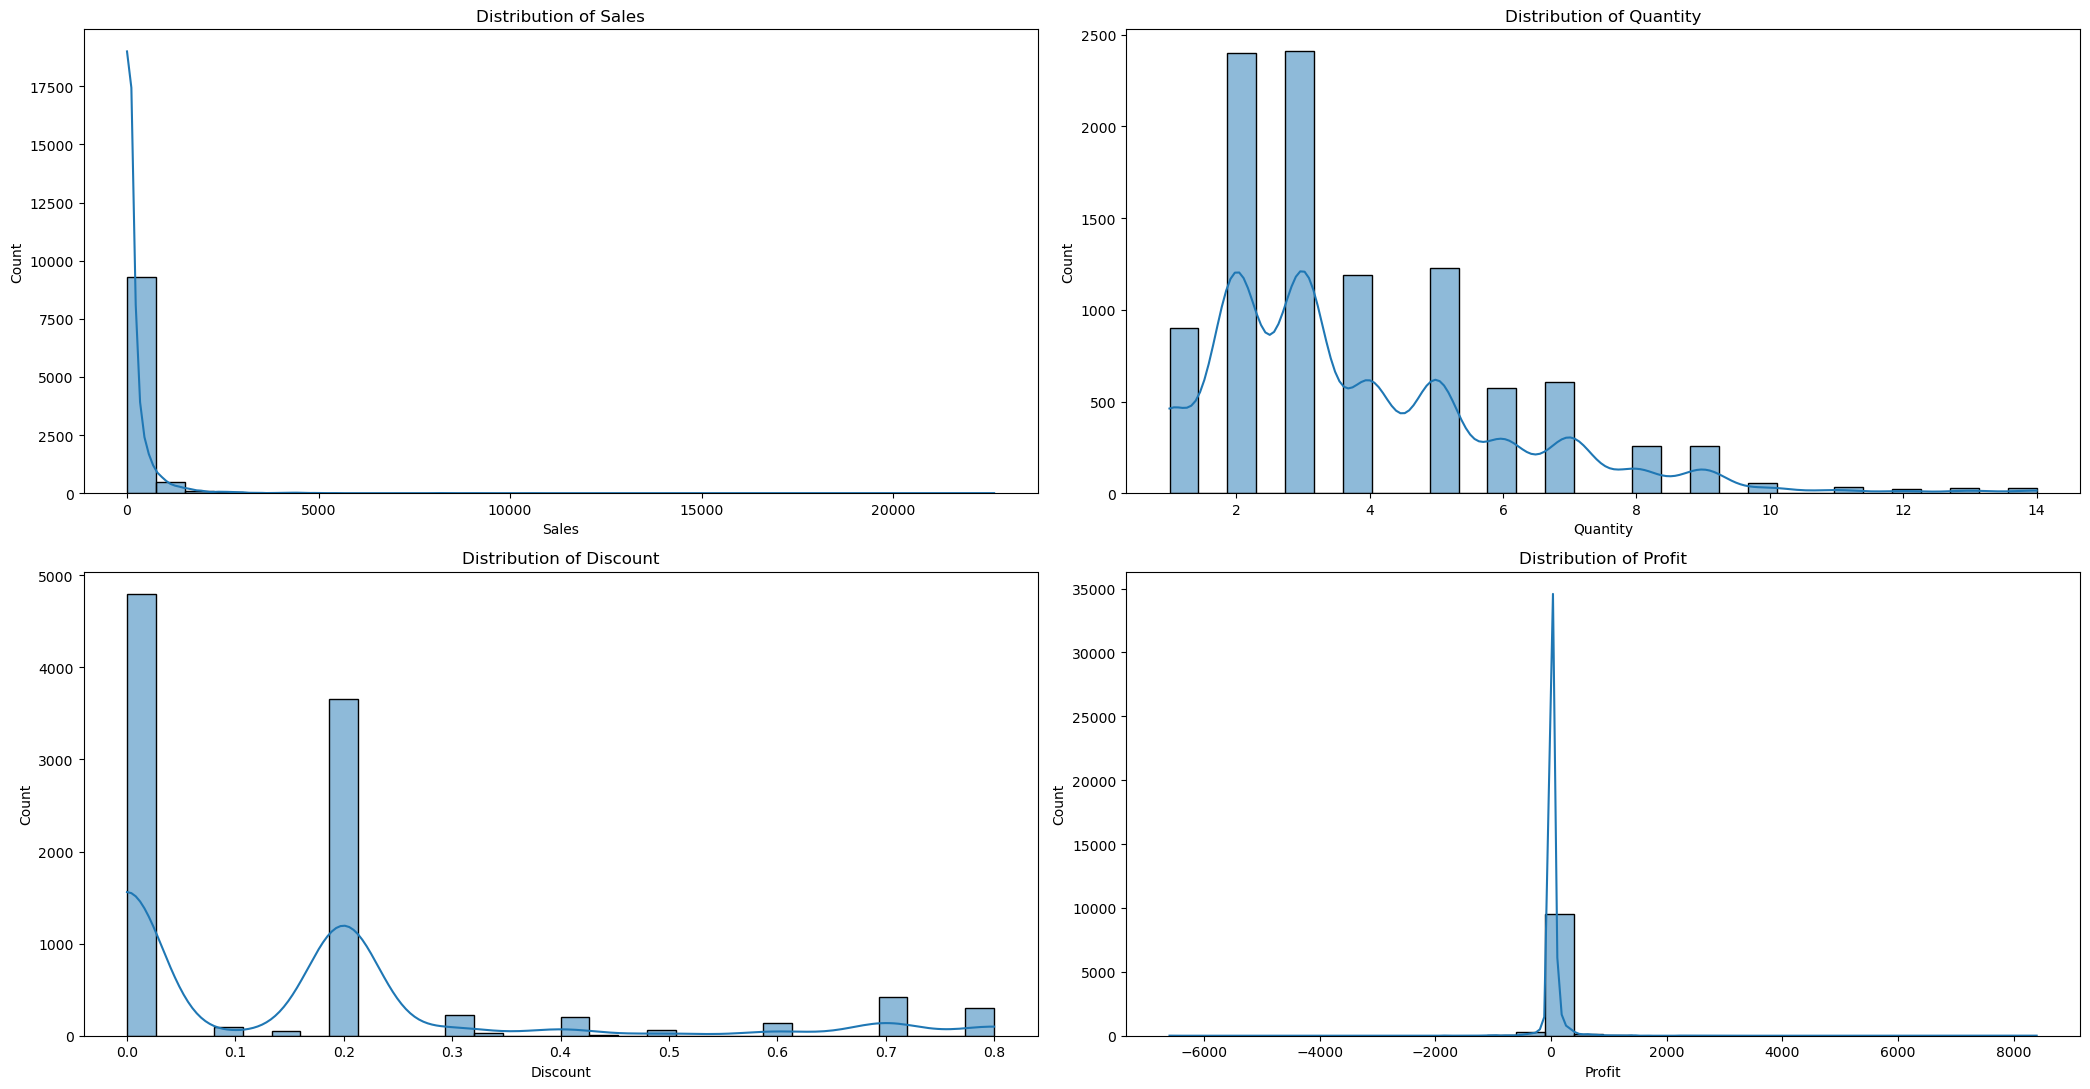

In [379]:
# Daftar kolom numerik yang akan divisualisasikan
kolom_numerik = ['Sales', 'Quantity', 'Discount', 'Profit']
judul_plot = ['Distribution of Sales', 'Distribution of Quantity', 'Distribution of Discount', 'Distribution of Profit']

# Membuat subplot 2 baris x 2 kolom
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(21, 11))
axs = axs.flatten()  # Flatten array untuk memudahkan iterasi

# Loop untuk menggambar histogram dengan KDE
for i, kolom in enumerate(kolom_numerik):
    sns.histplot(df[kolom], ax=axs[i], kde=True, bins=30)
    axs[i].set_title(judul_plot[i])
    axs[i].set_xlabel(kolom)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


Tidak ada satu pun kolom numerik dalam dataset yang berdistribusi normal. Maka dari itu, akan lebih tepat jika kita menggunakan metode analisis yang sesuai, seperti uji non-parametrik atau pendekatan lain yang tidak terlalu dipengaruhi oleh outlier.

In [380]:
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Outlier_Type
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,No Outlier
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,Positive Outlier
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,No Outlier
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,Negative Outlier
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,No Outlier


### **Korelasi**

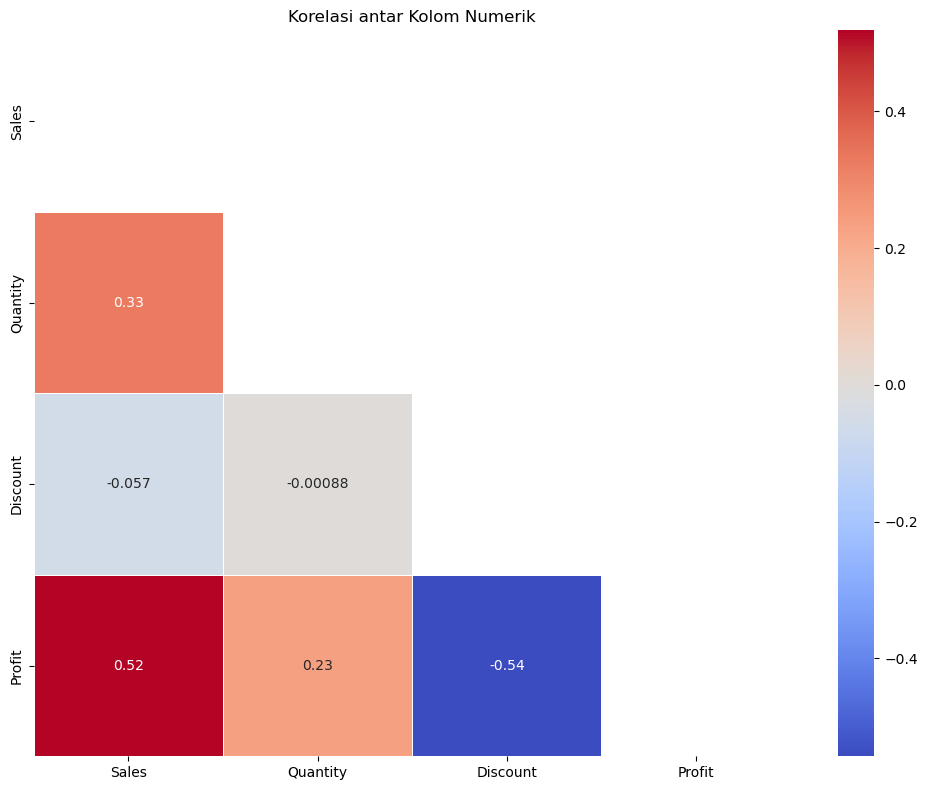

In [381]:
# Hitung korelasi menggunakan metode Spearman untuk kolom numerik
korelasi_data = df.select_dtypes(include='number').corr(method='spearman')

# Buat masking segitiga atas
masking = np.triu(np.ones_like(korelasi_data, dtype=bool))

# Buat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(data=korelasi_data, 
            mask=masking, 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5)

plt.title('Korelasi antar Kolom Numerik')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi heatmap korelasi, hubungan tertinggi ditemukan antara Profit dan Sales dengan nilai korelasi sebesar 0.52. Nilai ini termasuk dalam kategori korelasi sedang. Korelasi positif ini menunjukkan bahwa ketika nilai Sales meningkat, nilai Profit juga cenderung ikut naik.

### **Categorical Data Distribution**

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   object        
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

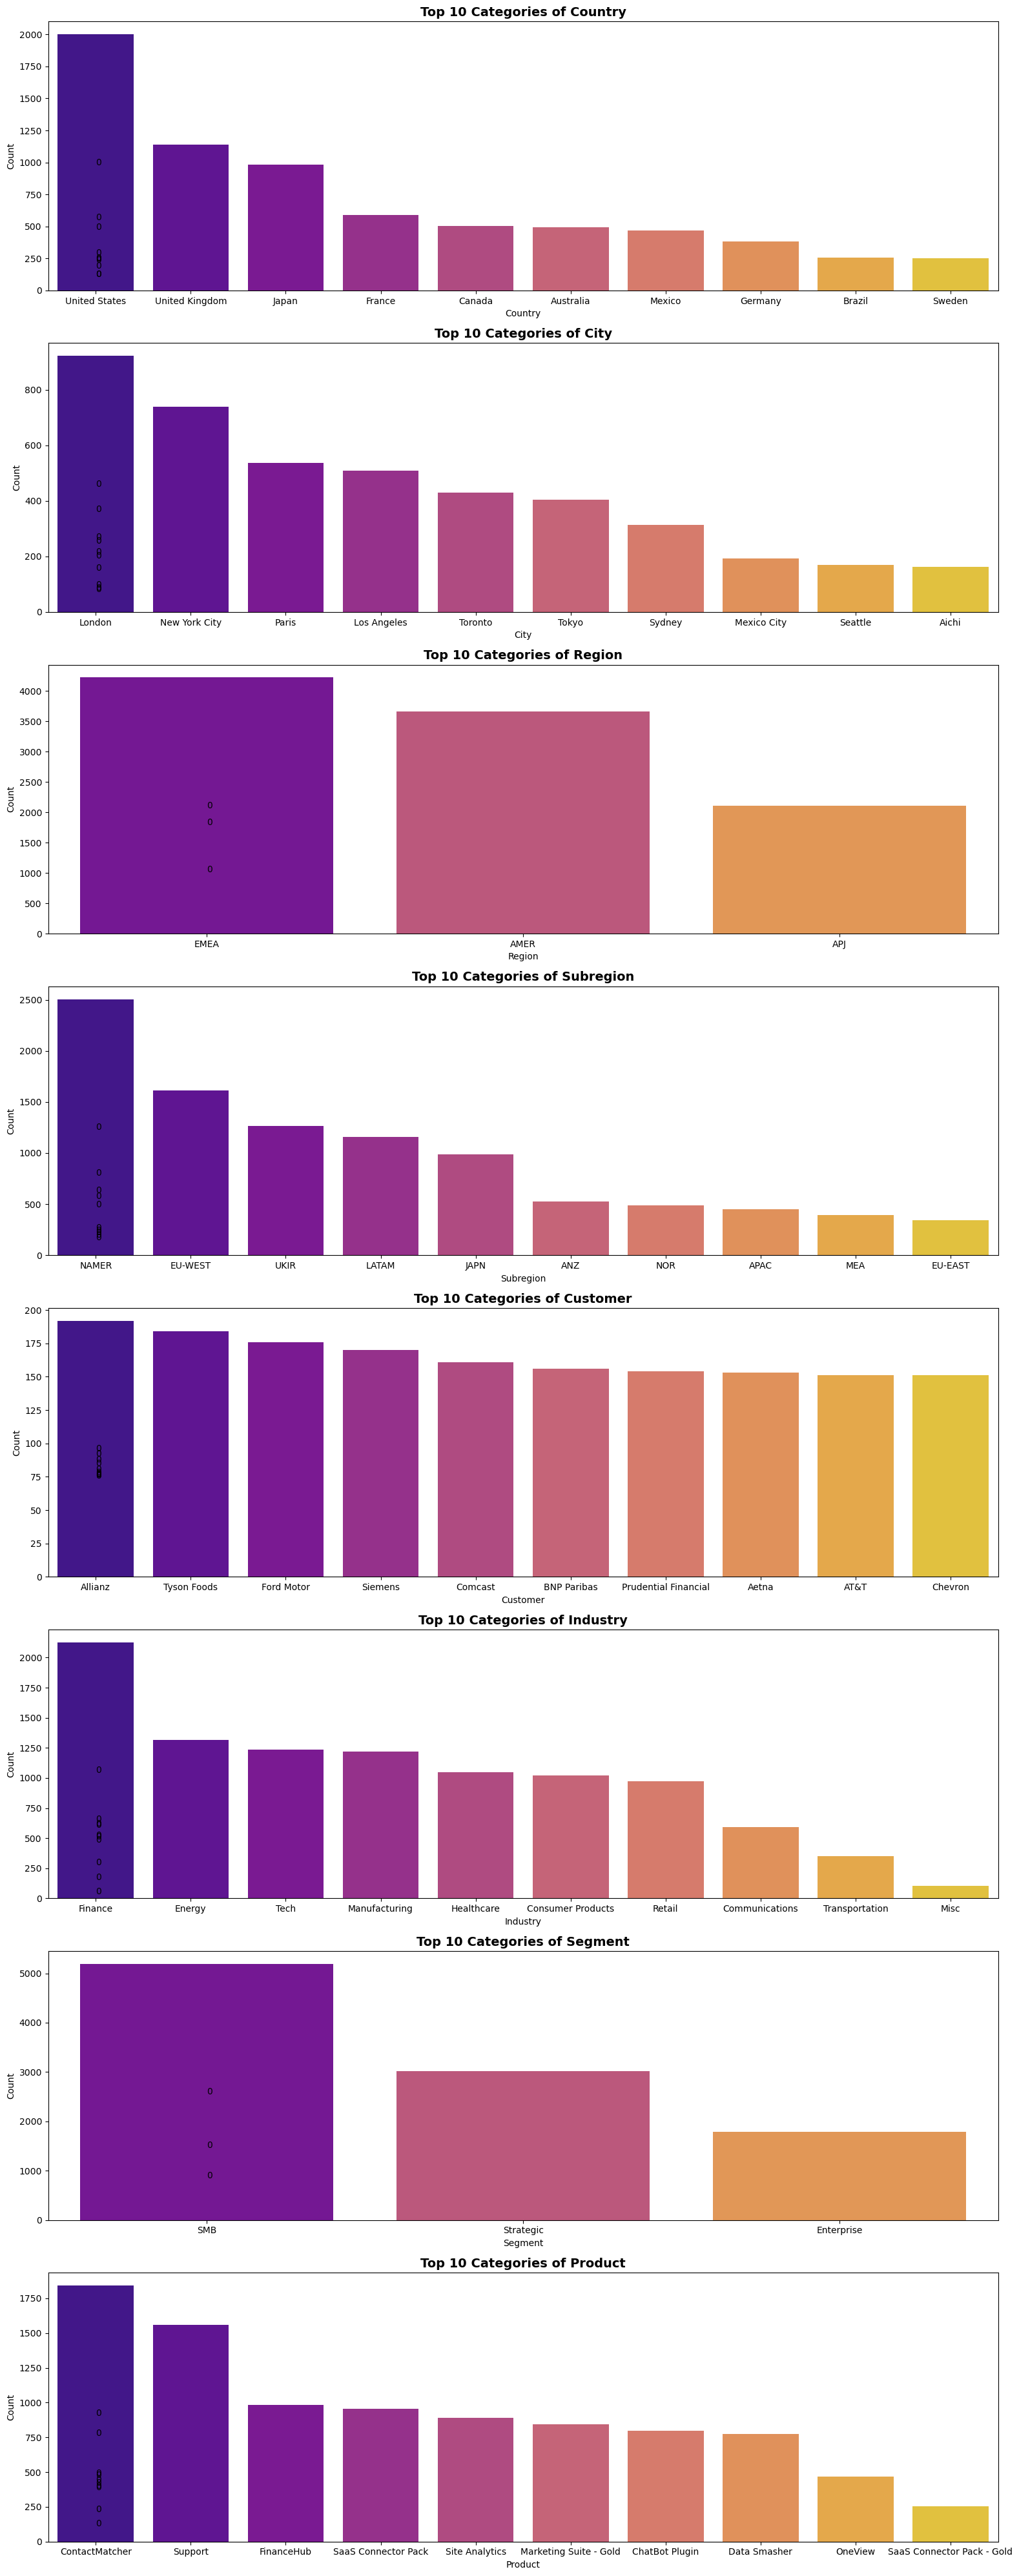

In [383]:
# Ambil kolom bertipe kategorikal
kolom_kategori = df.select_dtypes(include='object').columns.tolist()

# Hapus kolom yang tidak akan divisualisasikan
kolom_abaikan = ['Order ID', 'Customer ID', 'Contact Name', 'License', 'Outlier_Type']
for kolom in kolom_abaikan:
    if kolom in kolom_kategori:
        kolom_kategori.remove(kolom)

# Tentukan ukuran canvas
jumlah_kolom = len(kolom_kategori)
plt.figure(figsize=(16, jumlah_kolom * 5))

# Iterasi dan buat plot batang untuk setiap kolom kategorikal
nomor = 1
for kolom in kolom_kategori:
    plt.subplot(jumlah_kolom, 1, nomor)

    data_kategori = df[kolom].value_counts().sort_values(ascending=False).head(10)

    chart = sns.barplot(x=data_kategori.index, y=data_kategori.values, palette='plasma')
    chart.set_title(f'Top 10 Categories of {kolom}', fontsize=14, fontweight='bold')
    chart.set_xlabel(kolom)
    chart.set_ylabel('Count')

    # Tambahkan label jumlah di batang
    for bar in chart.patches:
        val = int(bar.get_width())
        chart.text(val, bar.get_y() + bar.get_height() / 2, f'{val}', 
                   ha='left', va='center', fontsize=10, color='black')

    nomor += 1

plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, kita dapat melihat 10 nilai terbanyak pada masing-masing kolom kategorikal. Informasi ini bisa menjadi dasar untuk analisis lanjutan di tahap berikutnya.

# **Data Analysis**

---

### **Melakukan analisis terhadap kinerja penjualan dan keuntungan untuk mengevaluasi performa perusahaan, dengan cara mengidentifikasi produk yang memberikan keuntungan tertinggi maupun yang paling rendah.**

Pada bagian analisis ini, kita akan menelaah kinerja penjualan dan keuntungan baik secara keseluruhan maupun secara lebih rinci, guna memperoleh pemahaman yang mendalam dan menyeluruh.

#### **Overall Profit and Sales Trend**

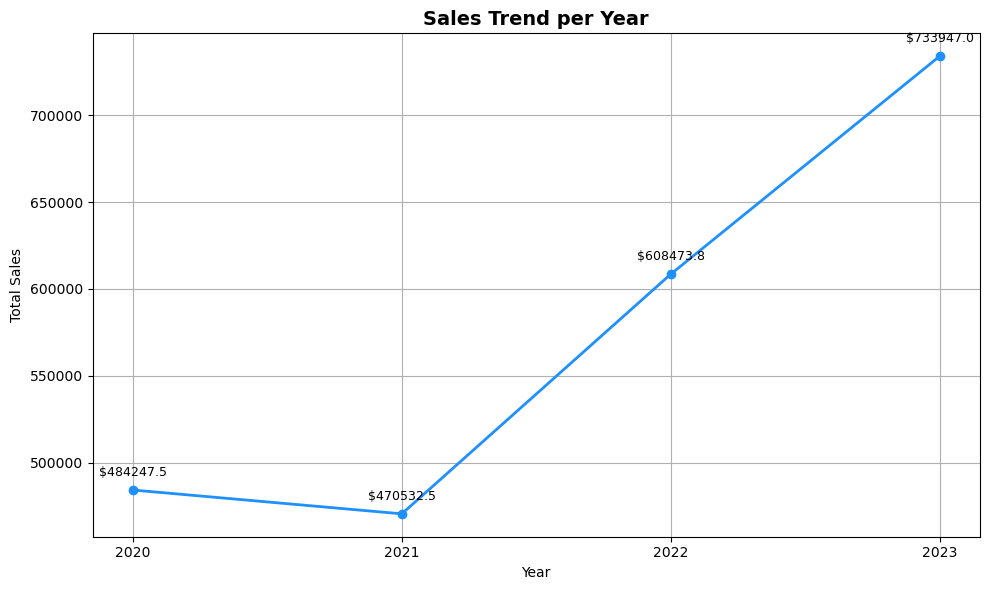

In [384]:
# Buat tren penjualan per tahun

# Ekstrak tahun dari kolom 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Kelompokkan data berdasarkan 'Year' dan jumlahkan penjualan
total_sales_tahunan = df.groupby('Year', as_index=False)['Sales'].sum()

# Buat plot tren penjualan
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(total_sales_tahunan['Year'], total_sales_tahunan['Sales'], marker='o', color='dodgerblue', linewidth=2)

# Tambahkan label pada tiap titik data
for x, y in zip(total_sales_tahunan['Year'], total_sales_tahunan['Sales']):
    ax.annotate(f"${y:.1f}", xy=(x, y), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=9)

# Pengaturan tambahan
ax.set_title('Sales Trend per Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
ax.set_xticks(total_sales_tahunan['Year'])
ax.grid(visible=True)

# Tampilkan grafik
plt.tight_layout()
plt.show()


Secara umum, tren penjualan dari tahun ke tahun menunjukkan arah yang positif, meskipun sempat mengalami penurunan pada tahun 2021.
- Tren penjualan secara keseluruhan menunjukkan peningkatan, namun terjadi penurunan signifikan pada tahun 2021.
- Pandemi COVID-19 menjadi faktor utama, yang menyebabkan gangguan besar pada perekonomian global dan menurunnya daya beli.
- Menurut Bank Dunia, PDB global turun 3,5% pada tahun 2020, yang berdampak pada pengurangan belanja konsumen dan investasi bisnis, termasuk terhadap pendapatan perusahaan.

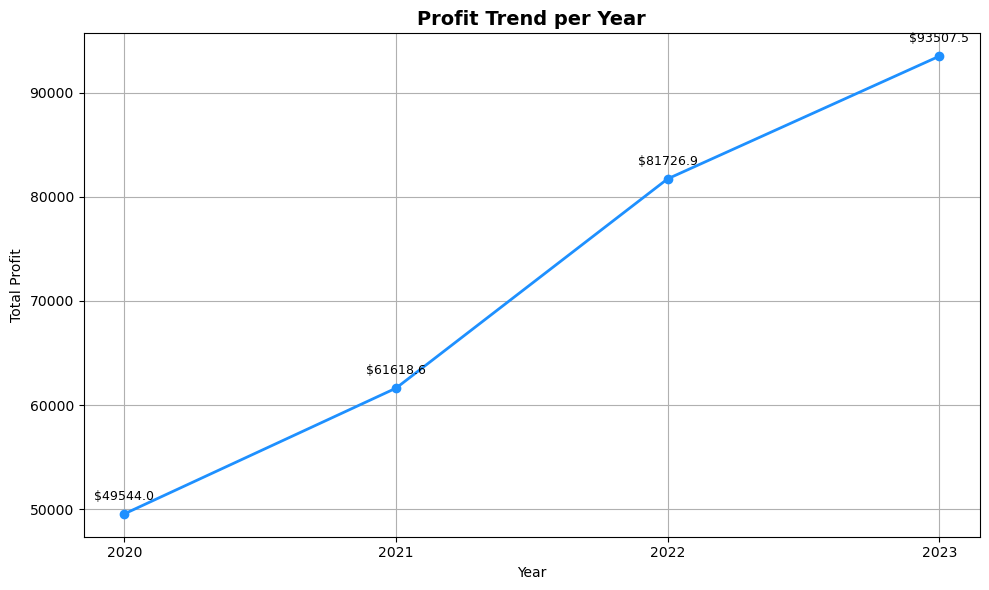

In [385]:
# Buat tren penjualan per tahun

# Ekstrak tahun dari kolom 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Kelompokkan data berdasarkan 'Year' dan jumlahkan penjualan
total_Profit_tahunan = df.groupby('Year', as_index=False)['Profit'].sum()

# Buat plot tren penjualan
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(total_Profit_tahunan['Year'], total_Profit_tahunan['Profit'], marker='o', color='dodgerblue', linewidth=2)

# Tambahkan label pada tiap titik data
for x, y in zip(total_Profit_tahunan['Year'], total_Profit_tahunan['Profit']):
    ax.annotate(f"${y:.1f}", xy=(x, y), xytext=(0, 10), textcoords='offset points', ha='center', fontsize=9)

# Pengaturan tambahan
ax.set_title('Profit Trend per Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Total Profit')
ax.set_xticks(total_Profit_tahunan['Year'])
ax.grid(visible=True)

# Tampilkan grafik
plt.tight_layout()
plt.show()


Tren keuntungan dari tahun 2020 hingga 2023 justru menunjukkan peningkatan yang stabil. Hal ini perlu ditelusuri lebih lanjut untuk memahami penyebab mengapa laba perusahaan meningkat sementara angka penjualannya menurun. Untuk memperoleh gambaran yang lebih jelas, penting untuk menganalisis rasio antara profit dan penjualan secara lebih mendalam.

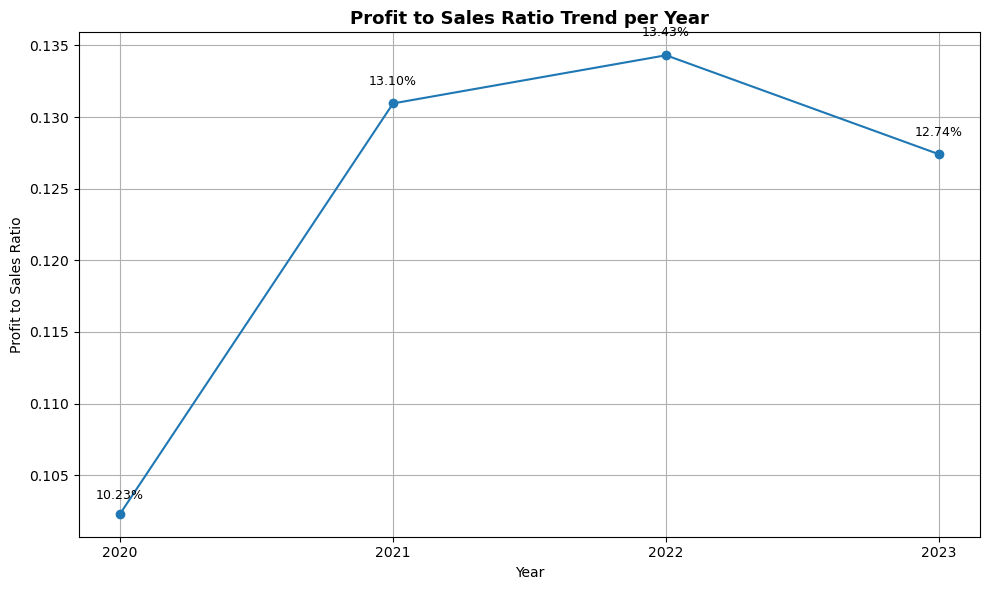

In [386]:
# Hitung total Sales dan Profit per tahun
ringkasan_tahunan = df.groupby('Year')[['Sales', 'Profit']].sum().reset_index()

# Hitung rasio Profit terhadap Sales
ringkasan_tahunan['Profit to Sales Ratio'] = ringkasan_tahunan['Profit'] / ringkasan_tahunan['Sales']

# Buat plot tren rasio
plt.figure(figsize=(10, 6))
plt.plot(ringkasan_tahunan['Year'], ringkasan_tahunan['Profit to Sales Ratio'], marker='o')

# Anotasi nilai rasio di tiap titik
for x, y in zip(ringkasan_tahunan['Year'], ringkasan_tahunan['Profit to Sales Ratio']):
    plt.text(x, y * 1.01, f'{y*100:.2f}%', ha='center', fontsize=9, color='black')

# Pengaturan grafik
plt.title('Profit to Sales Ratio Trend per Year', fontsize=13, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Profit to Sales Ratio')
plt.xticks(ringkasan_tahunan['Year'])
plt.grid(True)
plt.tight_layout()
plt.show()


Meskipun terjadi penurunan penjualan pada tahun 2021, rasio keuntungan terhadap penjualan justru mengalami peningkatan dibandingkan tahun 2020. Kenaikan rasio ini kemungkinan besar dipengaruhi oleh perbaikan dalam efisiensi operasional serta penerapan strategi pengelolaan biaya yang lebih baik. Berdasarkan laporan industri, banyak perusahaan yang berhasil menjaga atau bahkan meningkatkan profitabilitas mereka selama pandemi dengan cara memangkas biaya operasional dan menyederhanakan proses bisnis. Oleh karena itu, penting untuk menelusuri lebih lanjut strategi efisiensi apa saja yang telah diterapkan oleh perusahaan serta mengevaluasi dampaknya terhadap peningkatan rasio laba terhadap penjualan.

#### **Analisa Mendalam**

**Top Sales by Product**

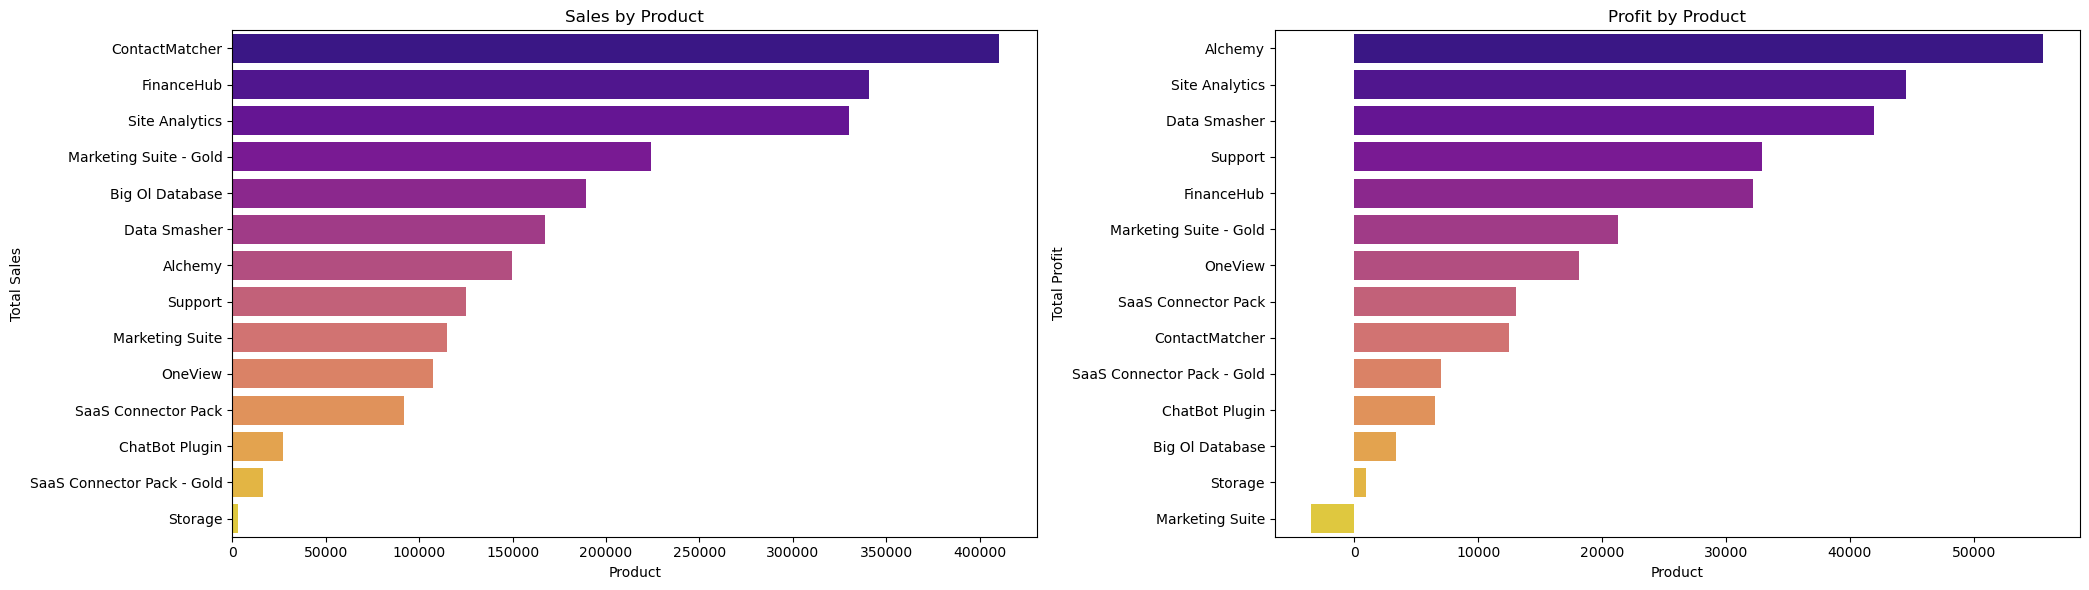

In [387]:
# Buat diagram batang untuk penjualan berdasarkan segmen pelanggan dan laba berdasarkan segmen pelanggan

sales_by_product = df.groupby('Product')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
profit_by_product = df.groupby('Product')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Set up the plotting style and size
plt.figure(figsize=(21, 6))

# Plotting the Sales by Customer Segment
plt.subplot(1, 2, 1)
sns.barplot(data = sales_by_product, x='Sales', y='Product', palette='plasma')
plt.title('Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')

# Plotting the Profit by Customer Segment
plt.subplot(1, 2, 2)
sns.barplot(data = profit_by_product, x='Profit', y='Product', palette='plasma')
plt.title('Profit by Product')
plt.xlabel('Product')
plt.ylabel('Total Profit')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Ringkasan Sales Berdasarkan Kategori Produk**<br><br>
Produk **Contact Matcher** memiliki penjualan tertinggi. Hal ini mungkin karena fungsinya yang penting dalam membantu bisnis mengelola hubungan dengan pelanggan dan meningkatkan efektivitas tim penjualan serta pemasaran.

Sementara itu, produk **Storage** mencatat penjualan paling rendah. Kemungkinan karena banyak pesaing menawarkan layanan serupa dengan harga berbeda, dan banyak perusahaan kini lebih memilih penyimpanan berbasis cloud yang sudah termasuk dalam paket layanan lain.

**Ringkasan Profit Berdasarkan Kategori Produk**<br><br>
Produk **Alchemy** memberikan keuntungan tertinggi. Kemungkinan besar karena produk ini memiliki nilai tambah yang unik dan dibutuhkan oleh segmen pasar tertentu yang bersedia membayar lebih mahal. Alchemy juga mungkin sering digunakan untuk kebutuhan bisnis yang kompleks, sehingga pelanggan cenderung melakukan pembelian ulang dan bertahan dalam jangka panjang, yang berdampak positif pada profit.

Sebaliknya, produk **Marketing Suite** justru mengalami kerugian. Hal ini bisa disebabkan oleh biaya pengembangan dan promosi yang besar, sementara pendapatannya belum cukup untuk menutup biaya tersebut. Selain itu, persaingan di bidang alat pemasaran juga cukup ketat, sehingga sulit mendapatkan keuntungan yang optimal.

Produk **Storage** menghasilkan sedikit keuntungan karena jumlah penjualannya sangat rendah. Meskipun tidak terlalu diminati, kemungkinan ada sebagian pelanggan tetap yang membuat produk ini masih mencatatkan profit kecil. Namun, karena volumenya terbatas, dampaknya terhadap keuntungan total menjadi sangat kecil.

### **Melakukan analisis terhadap kelompok pelanggan berdasarkan kebiasaan belanja mereka, serta petakan sebaran pelanggan untuk memahami pola distribusinya secara geografis atau demografis.**

Bagian ini akan membahas hal-hal berikut:

- **Kontribusi Penjualan**: Mengukur seberapa besar peran masing-masing segmen pelanggan terhadap total penjualan dan keuntungan perusahaan.  
- **Preferensi Produk**: Mengetahui produk apa saja yang paling diminati di tiap segmen pelanggan.  
- **Analisis Demografis**: Melakukan perbandingan antar segmen berdasarkan faktor seperti wilayah, negara, atau jenis industri.

In [388]:
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Outlier_Type,Year
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,No Outlier,2022
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,Positive Outlier,2022
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,No Outlier,2022
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,Negative Outlier,2021
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,No Outlier,2021


**Customer Segment Proportion**

In [389]:
df['Segment'].value_counts()

Segment
SMB           5191
Strategic     3020
Enterprise    1783
Name: count, dtype: int64

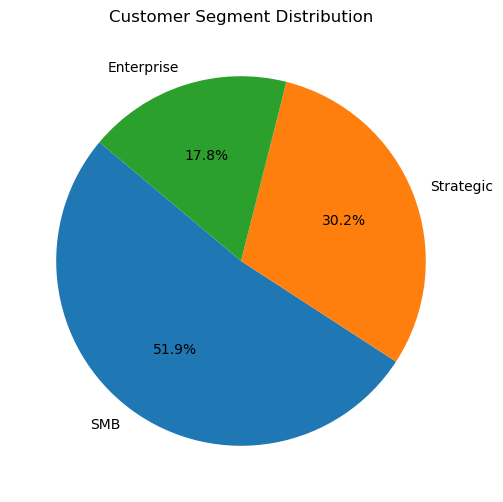

In [390]:
# Buat diagram lingkaran untuk distribusi segmen pelanggan

# Hitung jumlah pelanggan di setiap segmen
segment_counts = df['Segment'].value_counts()

# Menggambarkan segmen pelanggan dalam diagram lingkaran
plt.figure(figsize=(10, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)

# Tambahkan judul dan label
plt.title('Customer Segment Distribution')

# Show the plot
plt.show()

Kebanyakan pelanggan berasal dari segmen **SMB** (usaha kecil dan menengah). Ini mungkin karena produk kita cocok dengan kebutuhan dan anggaran mereka. SMB biasanya mencari solusi yang praktis dan terjangkau, sehingga lebih tertarik menggunakan layanan kita. Jumlah bisnis kecil juga jauh lebih banyak dibanding perusahaan besar.

Sedangkan segmen **Enterprise** punya jumlah pelanggan paling sedikit. Ini bisa disebabkan oleh proses pembelian yang lebih lama, kebutuhan khusus yang lebih banyak, atau karena mereka sudah punya penyedia layanan lain.

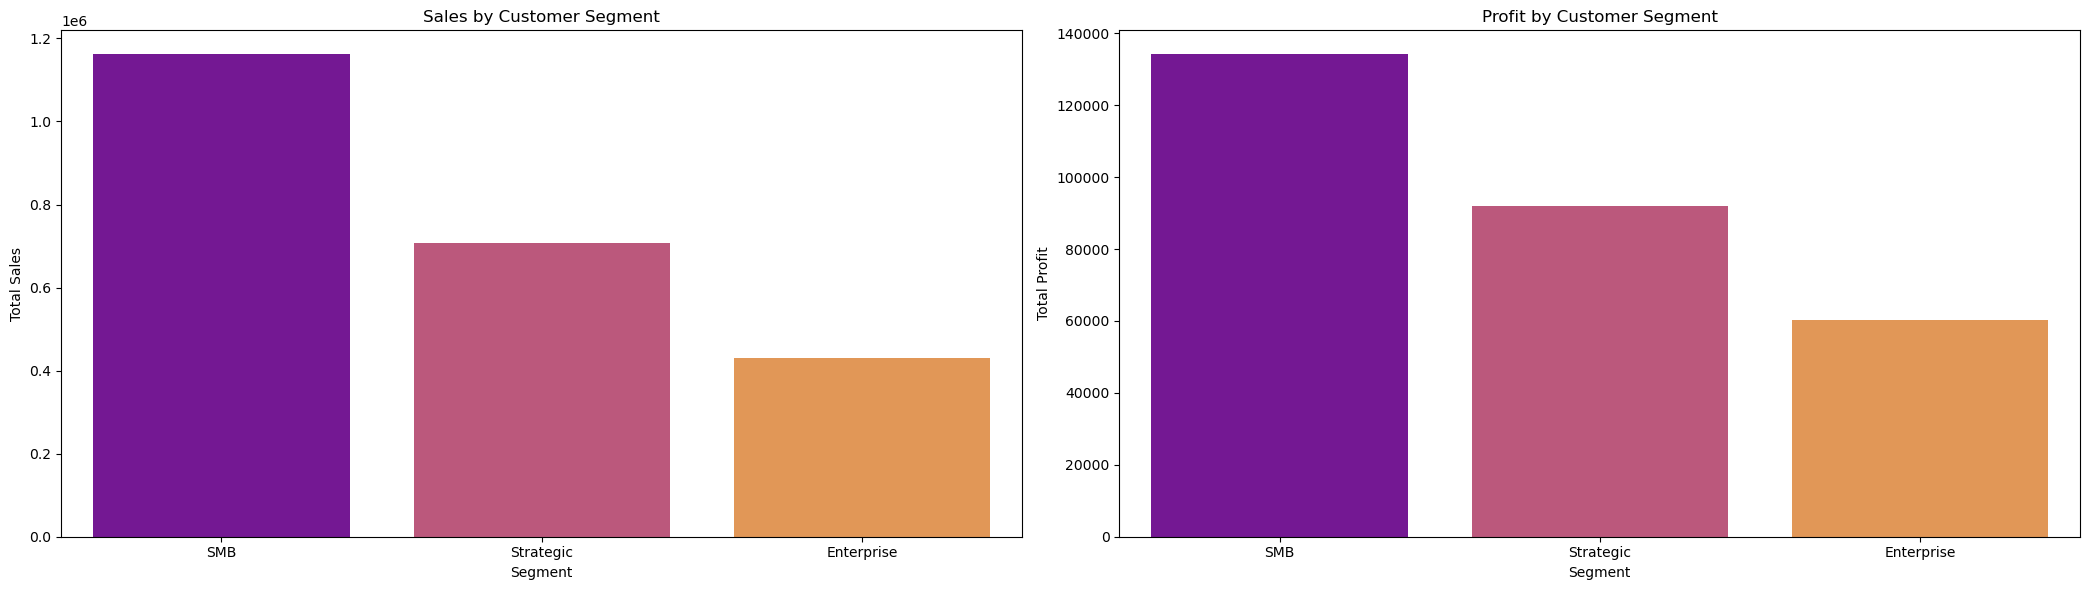

In [391]:
# Aggregate total sales and profit by customer segment
segment_summary = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

# Plot configuration
fig, axes = plt.subplots(1, 2, figsize=(21, 6))

# Sales barplot
sns.barplot(x='Segment', y='Sales', data=segment_summary.sort_values('Sales', ascending=False), ax=axes[0], palette='plasma')
axes[0].set_title('Sales by Customer Segment')
axes[0].set_xlabel('Segment')
axes[0].set_ylabel('Total Sales')

# Profit barplot
sns.barplot(x='Segment', y='Profit', data=segment_summary.sort_values('Profit', ascending=False), ax=axes[1], palette='plasma')
axes[1].set_title('Profit by Customer Segment')
axes[1].set_xlabel('Segment')
axes[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()


Segmen **SMB** memberikan kontribusi terbesar terhadap penjualan dan keuntungan, disusul oleh segmen **Strategic** dan **Enterprise**. Pola distribusi penjualan dan profit ini sejalan dengan jumlah pelanggan di masing-masing segmen, yang menunjukkan bahwa mayoritas pendapatan perusahaan berasal dari segmen SMB.

**Customer Industry Proportion**

In [392]:
df['Industry'].value_counts()

Industry
Finance              2127
Energy               1316
Tech                 1236
Manufacturing        1222
Healthcare           1049
Consumer Products    1021
Retail                972
Communications        593
Transportation        351
Misc                  107
Name: count, dtype: int64

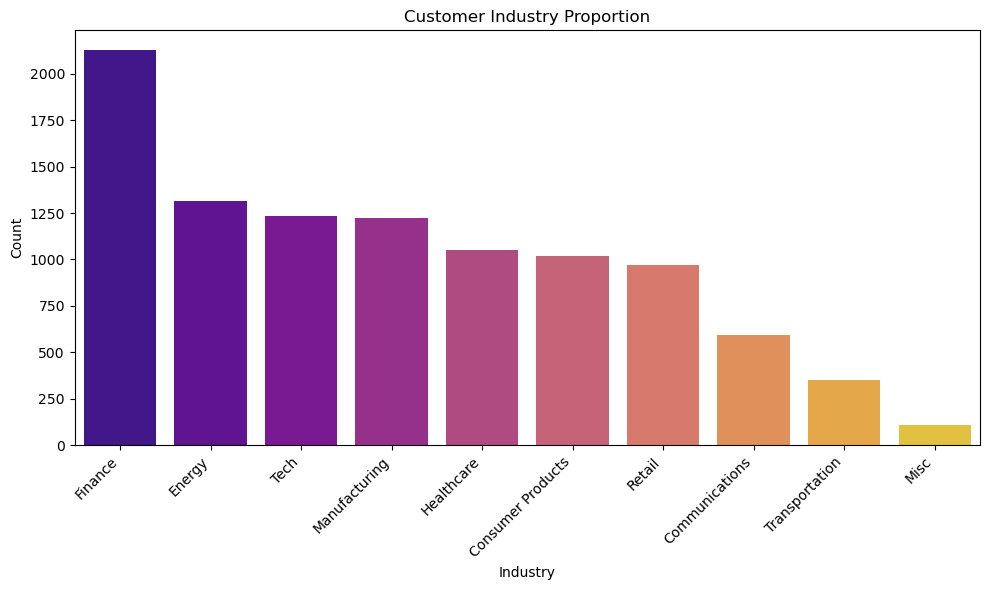

In [393]:
# Show customer industry proportion with barplot

# Count the number of customers in each industry
industry_counts = df['Industry'].value_counts()

# Plotting the customer industry in bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='plasma')

# Add titles and labels
plt.title('Customer Industry Proportion')
plt.xlabel('Industry')
plt.ylabel('Count')

# Memiringkan label sumbu x
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Untuk menyesuaikan layout agar label tidak terpotong

# Show the plot
plt.show()

- Industri **Finance** tercatat sebagai sektor dengan jumlah transaksi terbanyak bersama perusahaan kita. Hal ini menunjukkan bahwa sektor ini merupakan salah satu pasar utama bagi produk yang kita tawarkan.

- Perlu dilakukan analisis lebih lanjut untuk mengetahui produk apa saja yang paling banyak dibeli oleh sektor Finance, agar strategi pemasaran dan pengembangan produk bisa lebih tepat sasaran.

- Selain itu, sektor **Energy**, **Tech**, dan **Manufacturing** juga menunjukkan kontribusi transaksi yang besar. Ini bisa jadi karena produk SaaS yang kita sediakan sangat relevan dengan kebutuhan operasional mereka, seperti efisiensi sistem, pengelolaan data, dan otomatisasi proses bisnis. Potensi pada sektor-sektor ini layak untuk digarap lebih dalam.

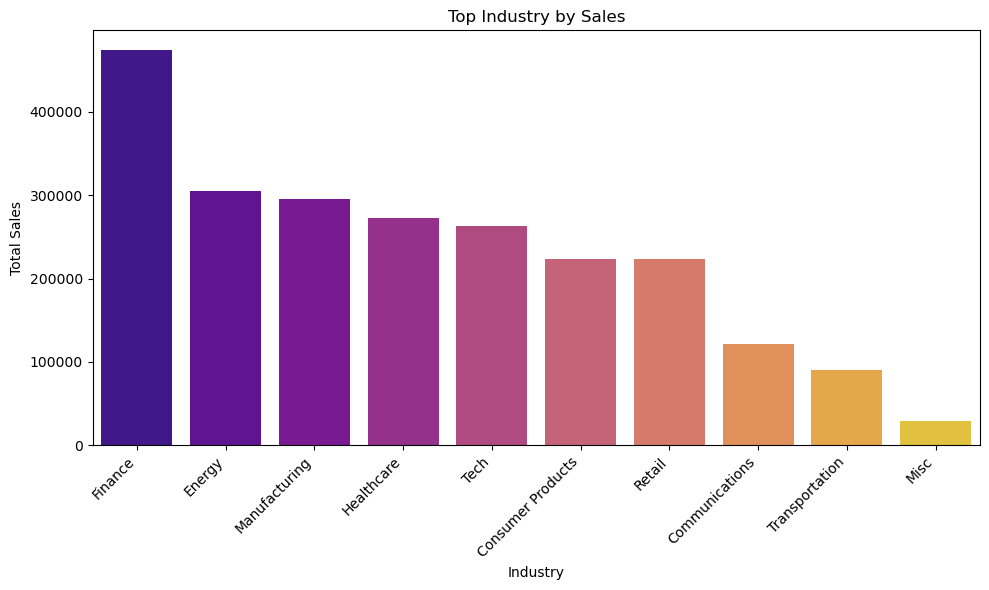

In [394]:
# Find industries that have most sales

# Group by Industry and sum the Sales
top_sales_industry = df.groupby('Industry')['Sales'].sum().reset_index()

# Sort the industries by Sales in descending order
top_sales_industry = top_sales_industry.sort_values(by='Sales', ascending=False)

# Plotting the Industry by Sales descending order
plt.figure(figsize=(10, 6))
sns.barplot(x='Industry', y='Sales', data=top_sales_industry, palette='plasma')

# Add titles and labels
plt.title('Top Industry by Sales')
plt.xlabel('Industry')
plt.ylabel('Total Sales')

# Memiringkan label sumbu x
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Untuk menyesuaikan layout agar label tidak terpotong

# Show the plot
plt.show()

- **Industri Finance mencatat penjualan tertinggi**, yang menunjukkan bahwa sektor ini menjadi salah satu kontributor utama pendapatan perusahaan. Hal ini mungkin disebabkan oleh tingginya kebutuhan akan solusi perangkat lunak di sektor keuangan, serta nilai transaksi yang besar dan potensi pendapatan berulang dari klien di bidang ini.

- **Sektor Energy dan Manufacturing menempati posisi berikutnya dalam kontribusi penjualan.** Keduanya menyumbang pendapatan yang cukup besar, kemungkinan karena memerlukan perangkat lunak khusus untuk mendukung operasional, efisiensi proses, dan kepatuhan terhadap regulasi industri.

- **Meskipun industri Tech memiliki jumlah transaksi yang tinggi, total penjualannya tidak dominan.** Hal ini bisa disebabkan oleh sifat pasar teknologi yang sangat kompetitif, di mana perusahaan memiliki banyak pilihan solusi dan cenderung lebih memperhatikan efisiensi biaya daripada fitur premium.

- **Industri Misc mencatat penjualan paling rendah di antara seluruh sektor**. Hal ini kemungkinan terjadi karena kategori "Misc" mencakup berbagai industri yang tidak terklasifikasi secara spesifik, sehingga permintaannya lebih tersebar dan tidak terfokus pada satu jenis solusi perangkat lunak. Selain itu, bisa jadi sebagian besar entitas dalam kategori ini memiliki skala usaha yang lebih kecil atau kebutuhan digitalisasi yang belum sebesar sektor lainnya seperti keuangan atau energi.

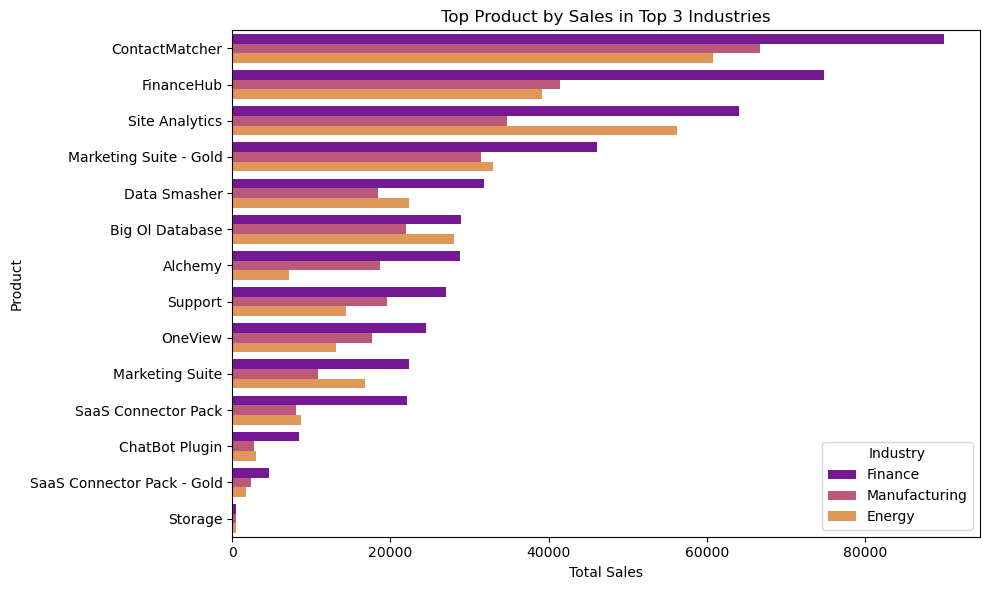

In [395]:
# Identify top 3 industries based on total sales
top_industries = df.groupby('Industry')['Sales'].sum().nlargest(3).index

# Filter data for top 3 industries only
filtered_data = df[df['Industry'].isin(top_industries)]

# Aggregate sales by product within each industry
product_sales = filtered_data.groupby(['Product', 'Industry'])['Sales'].sum().reset_index()

# Sort by total sales
product_sales = product_sales.sort_values('Sales', ascending=False)

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(data=product_sales, x='Sales', y='Product', hue='Industry', palette='plasma')
plt.title('Top Product by Sales in Top 3 Industries')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


- **ContactMatcher**, **FinanceHub**, dan **Site Analytic** merupakan produk dengan penjualan tertinggi di tiga industri utama. Ketiganya juga menempati posisi teratas dalam total penjualan secara keseluruhan.

- Penjualan **Site Analytics** di sektor **energi** lebih tinggi dibandingkan dengan sektor **manufaktur**. Hal ini menunjukkan adanya peluang peningkatan strategi penjualan di industri manufaktur untuk produk tersebut.

**Bandingkan customer segments berdasarkan demografi seperti region, country**

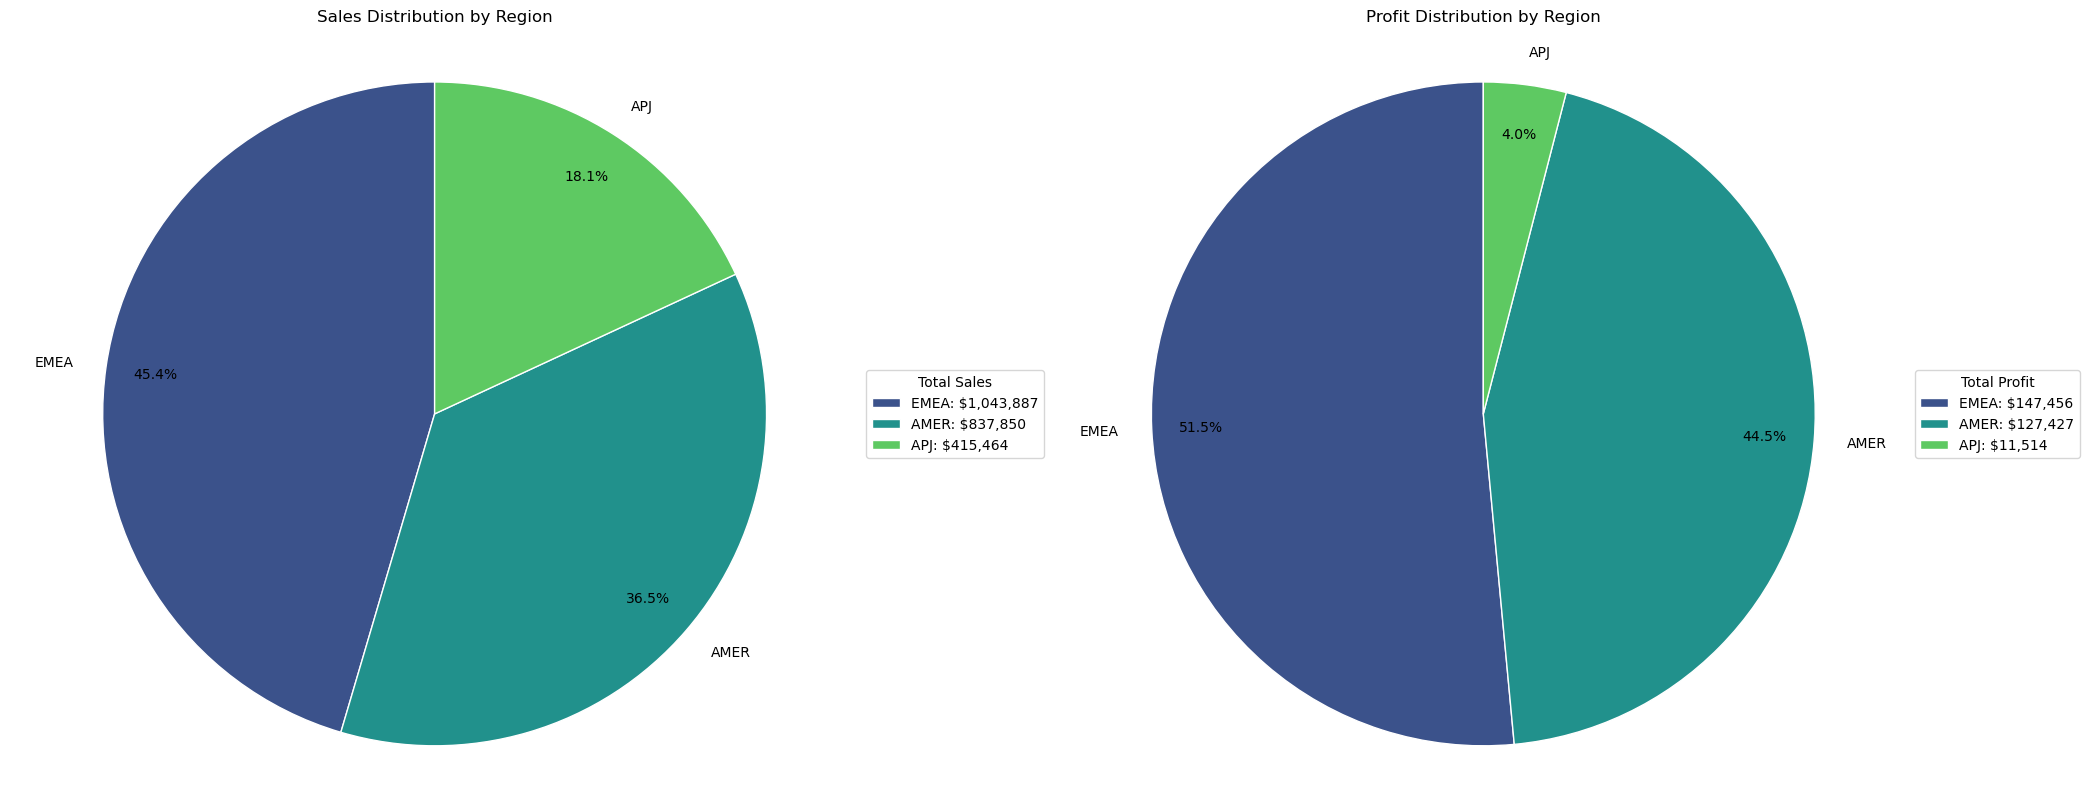

In [396]:
# Create a figure with two subplots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(21, 8))

# Group by Region and sum the Sales
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
sales_by_region = sales_by_region.sort_values(by='Sales', ascending=False)

# Plotting the Sales by Region as pie chart
wedges, texts, autotexts = ax0.pie(sales_by_region['Sales'], 
                                   labels=sales_by_region['Region'], 
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   colors=sns.color_palette('viridis', len(sales_by_region)),
                                   wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                   pctdistance=0.85)

# Add title for sales plot
ax0.set_title('Sales Distribution by Region', pad=20)

# Create legend with Sales values
legend_labels = [f'{region}: ${sales:,.0f}' 
                for region, sales in zip(sales_by_region['Region'], sales_by_region['Sales'])]
ax0.legend(wedges, legend_labels,
          title="Total Sales",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Group by Region and sum the Profit
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()
profit_by_region = profit_by_region.sort_values(by='Profit', ascending=False)

# Plotting the Profit by Region as pie chart
wedges, texts, autotexts = ax1.pie(profit_by_region['Profit'], 
                                  labels=profit_by_region['Region'], 
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  colors=sns.color_palette('viridis', len(profit_by_region)),
                                  wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                                  pctdistance=0.85)

# Add title for profit plot
ax1.set_title('Profit Distribution by Region', pad=20)

# Create legend with Profit values
legend_labels = [f'{region}: ${profit:,.0f}' 
                for region, profit in zip(profit_by_region['Region'], profit_by_region['Profit'])]
ax1.legend(wedges, legend_labels,
          title="Total Profit",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax0.axis('equal')
ax1.axis('equal')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

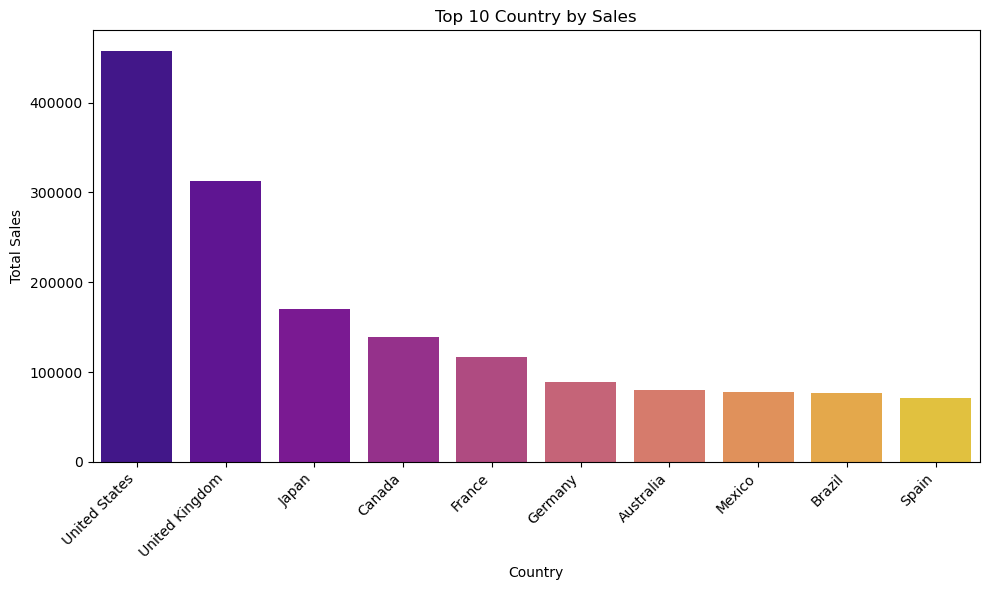

In [397]:
# Show top 10 Country by sales

# Group by Country and sum the Sales
top_sales_country = df.groupby('Country')['Sales'].sum().reset_index()

# Sort the countries by Sales in descending order
top_sales_country = top_sales_country.sort_values(by='Sales', ascending=False).head(10)

# Plotting the Country by Sales descending order
plt.figure(figsize=(10, 6))
sns.barplot( data=top_sales_country, x='Country', y='Sales',palette='plasma')

# Add titles and labels
plt.title('Top 10 Country by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')

# Memiringkan label sumbu x
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Untuk menyesuaikan layout agar label tidak terpotong

# Show the plot
plt.show()

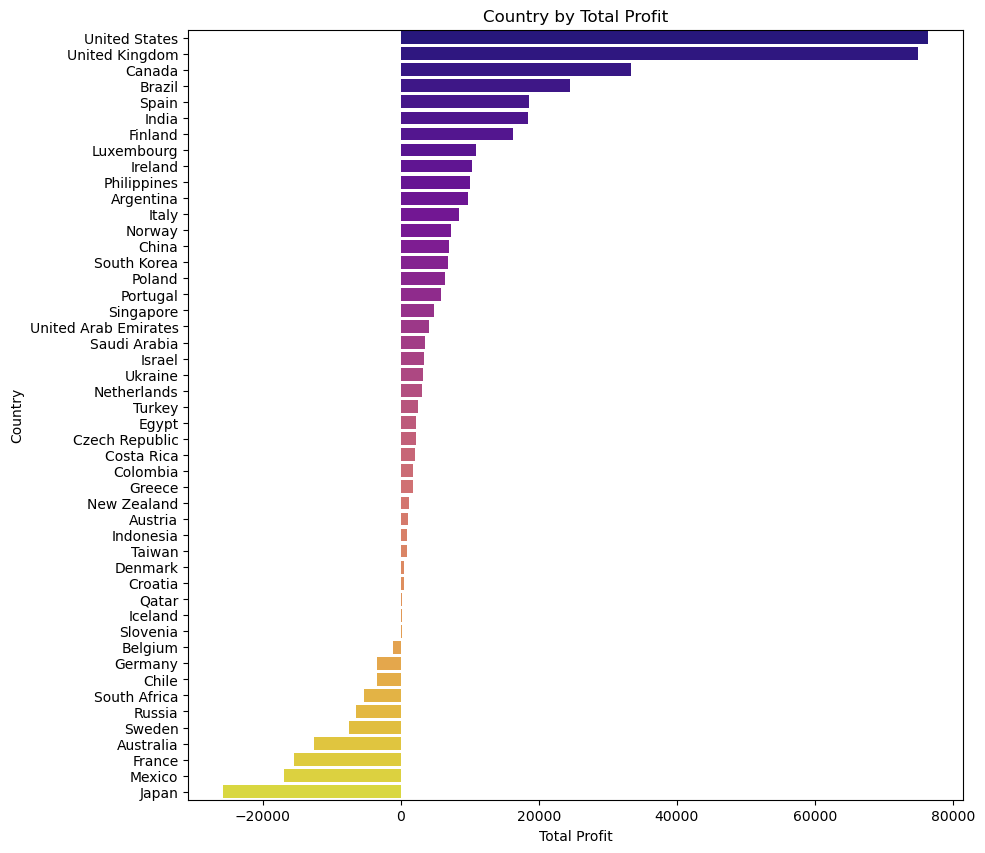

In [398]:
# show top 10 country with most profit and show it in bar plot

# Group by Country and sum the Profit
top_profit_country = df.groupby('Country')['Profit'].sum().reset_index()

# Sort the countries by Profit in descending order
top_profit_country = top_profit_country.sort_values(by='Profit', ascending=False)

# Plotting the Country by Profit descending order
plt.figure(figsize=(10, 10))
sns.barplot(data=top_profit_country, x='Profit', y='Country',palette='plasma')

# Add titles and labels
plt.title('Country by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Country')

# Show the plot
plt.show()


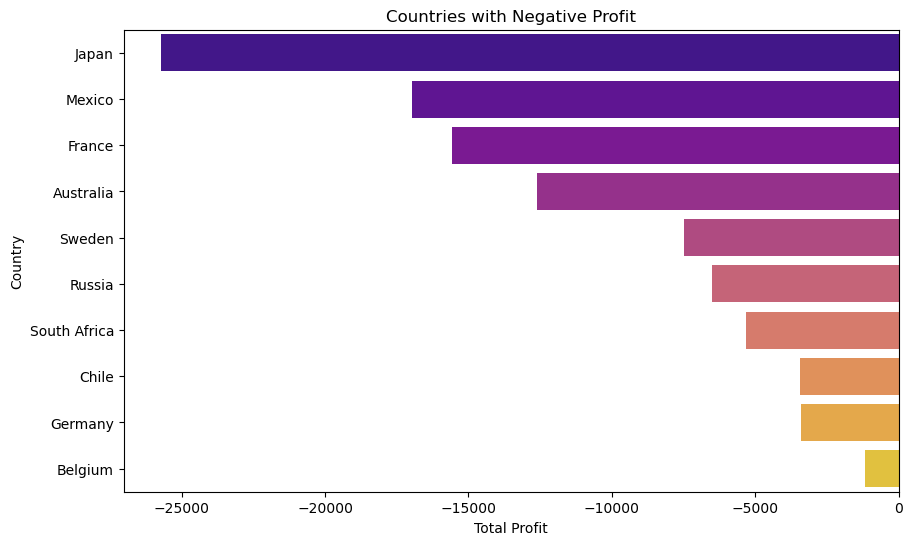

In [399]:
# Group by Country and sum the Profit
top_loss_country = df.groupby('Country')['Profit'].sum().reset_index()

# Sort the countries by Profit in order
top_loss_country = top_loss_country[top_loss_country['Profit'] < 0].sort_values(by='Profit', ascending=True)

# Plotting the Country by Profit descending order
plt.figure(figsize=(10, 6))
sns.barplot(data=top_loss_country, x='Profit', y='Country',palette='plasma')

# Add titles and labels
plt.title('Countries with Negative Profit')
plt.xlabel('Total Profit')
plt.ylabel('Country')

# Show the plot
plt.show()


- **The United States** mencatatkan angka penjualan dan keuntungan tertinggi, disusul oleh **Inggris Raya**. Hal ini menunjukkan bahwa kedua negara tersebut merupakan pasar utama dan penyumbang pendapatan terbesar bagi perusahaan.

- Terdapat pola menarik dalam distribusi penjualan dan keuntungan antar negara. **Jepang** berada di peringkat ketiga dalam hal penjualan, namun justru mencatatkan kerugian paling besar, yakni sebesar **-$25.729**. Artinya, tingginya penjualan di Jepang tidak serta merta berbanding lurus dengan profit yang dihasilkan. Hal ini kemungkinan disebabkan oleh tingginya biaya operasional, kebijakan lokal yang ketat, atau faktor eksternal lainnya yang mempengaruhi efisiensi bisnis.

- Selain Jepang, terdapat beberapa negara lain yang juga menunjukkan nilai **profit negatif**. Kondisi ini perlu dianalisis lebih lanjut untuk mengetahui akar permasalahannya serta mencari strategi atau solusi yang tepat guna meningkatkan profitabilitas di negara-negara tersebut.

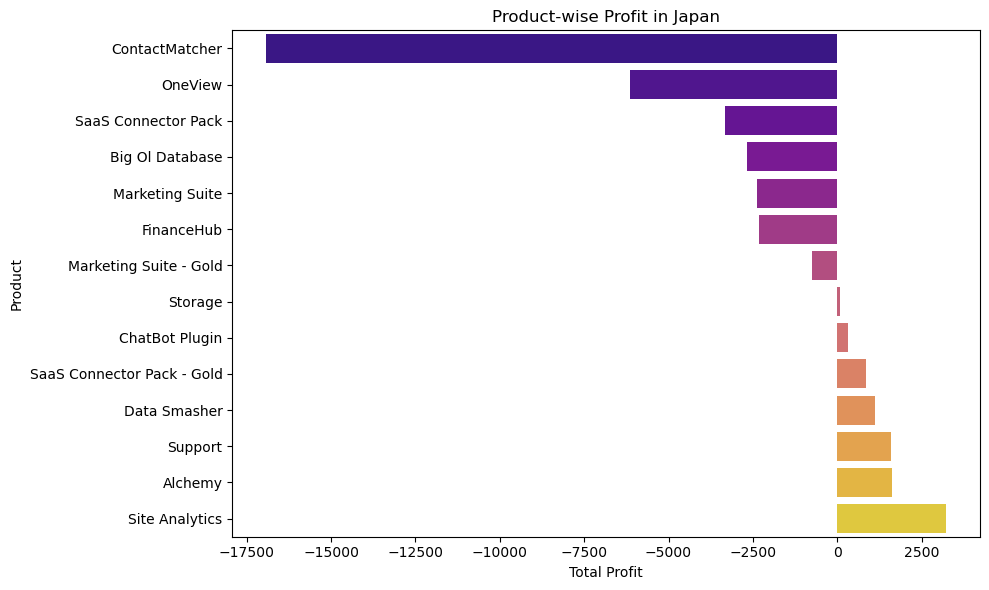

In [400]:
# Calculate total profit by product for Japan
japan_profit = df[df['Country'] == 'Japan'].groupby('Product')['Profit'].sum().sort_values().reset_index()

# Plot profit per product in Japan
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Product', data=japan_profit, palette='plasma')
plt.title('Product-wise Profit in Japan')
plt.xlabel('Total Profit')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


Setelah dilakukan analisis terhadap distribusi penjualan dan keuntungan di Jepang, ditemukan bahwa **7 dari 14 produk mengalami kerugian**. Produk dengan kerugian terbesar adalah **ContactMatcher**, dengan nilai kerugian sekitar **$17.000** di pasar Jepang. 

Kondisi ini menunjukkan adanya tantangan serius dalam profitabilitas beberapa produk di negara tersebut. Untuk memperbaiki kinerja penjualan dan keuntungan, perlu dilakukan evaluasi menyeluruh terhadap **strategi harga**, **biaya operasional**, serta **tingkat permintaan pasar lokal**. Pendekatan yang lebih sesuai dengan karakteristik pasar Jepang sangat penting agar produk dapat bersaing dan memberikan hasil yang optimal.

**Periksa siapa saja pelanggan yang mengalami kerugian paling besar di Jepang.**

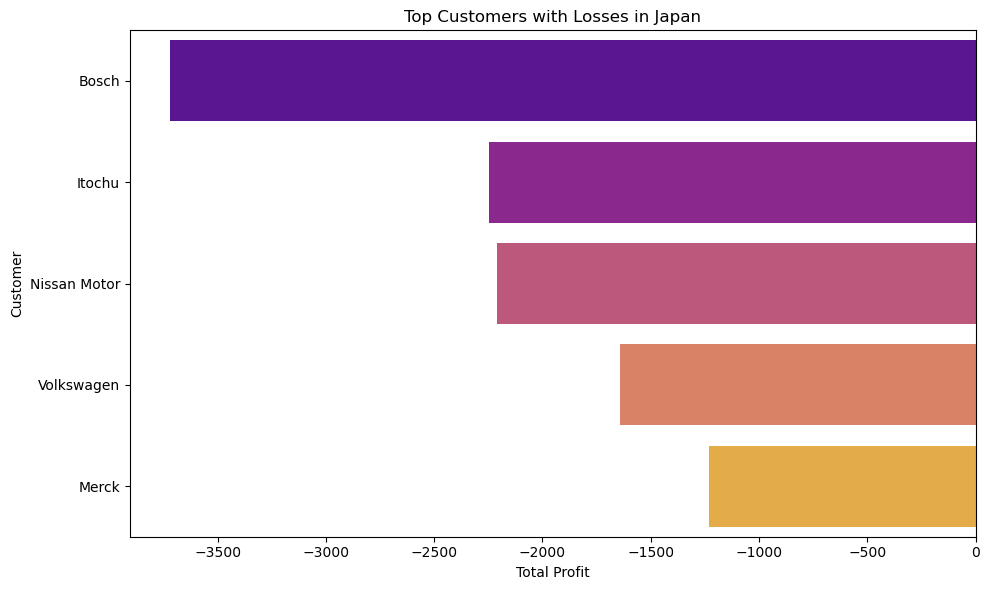

In [401]:
# Filter Japan data and compute total profit by customer
japan_loss = df[df['Country'] == 'Japan'].groupby('Customer')['Profit'].sum()
japan_loss = japan_loss[japan_loss < 0].nsmallest(5).reset_index()

# Plot top 5 customers with negative profit
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='Customer', data=japan_loss, palette='plasma')
plt.title('Top Customers with Losses in Japan')
plt.xlabel('Total Profit')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()


Dari informasi ini, kita dapat mengidentifikasi pelanggan yang memberikan kontribusi kerugian terbesar di Jepang. Data ini sangat berguna untuk melakukan evaluasi terhadap hubungan dengan pelanggan, kecocokan produk yang ditawarkan, serta strategi harga yang diterapkan kepada pelanggan-pelanggan tersebut. Dengan memahami lebih dalam karakteristik dan kebutuhan mereka, perusahaan dapat menyusun pendekatan yang lebih tepat guna meminimalkan kerugian dan meningkatkan profitabilitas di masa mendatang.

**Customer Geographical Distribution**

In [402]:
import time
from geopy.geocoders import Nominatim

# Group sales and profit by country
country_sales = df.groupby('Country')[['Sales', 'Profit']].sum().reset_index()
country_sales['Latitude'] = 0.0
country_sales['Longitude'] = 0.0

# Inisialisasi geolocator dengan timeout dan user-agent
geolocator = Nominatim(user_agent="geo_mapper", timeout=10)

# Loop setiap negara dan ambil koordinat
for country in country_sales['Country']:
    try:
        location = geolocator.geocode(country)
        if location:
            country_sales.loc[country_sales['Country'] == country, 'Latitude'] = location.latitude
            country_sales.loc[country_sales['Country'] == country, 'Longitude'] = location.longitude
        else:
            print(f"Location not found for {country}")
    except Exception as e:
        print(f"Error fetching location for {country}: {e}")
    time.sleep(1)  # Hindari rate limit

# Urutkan data berdasarkan nilai sales dan profit
country_sales = country_sales.sort_values(by='Sales', ascending=False)
country_profit = country_sales.sort_values(by='Profit', ascending=False)


In [403]:
# Create map to show country with biggest sales and lowest sales
import folium

# Create a map centered at [0, 0] with zoom level 2
sales_map = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for 5 top sales with blue
for i in range(5):
    folium.Marker(
        location=[country_sales['Latitude'].iloc[i], country_sales['Longitude'].iloc[i]],
        popup=f"{country_sales['Country'].iloc[i]}: ${country_sales['Sales'].iloc[i]:,.0f}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(sales_map)

# Add markers for 5 lowest sales with red
for i in range(-5, 0):
    folium.Marker(
        location=[country_sales['Latitude'].iloc[i], country_sales['Longitude'].iloc[i]],
        popup=f"{country_sales['Country'].iloc[i]}: ${country_sales['Sales'].iloc[i]:,.0f}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(sales_map)

# Display the map
sales_map

In [404]:
# Create map for profit in each country

# Create a map centered at [0, 0] with zoom level 2
profit_map = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for 5 top profit with blue
for i in range(5):
    folium.Marker(
        location=[country_profit['Latitude'].iloc[i], country_profit['Longitude'].iloc[i]],
        popup=f"{country_profit['Country'].iloc[i]}: ${country_profit['Profit'].iloc[i]:,.0f}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(profit_map)

# Add markers for 5 lowest profit (loss) with red
for i in range(-5, 0):
    folium.Marker(
        location=[country_profit['Latitude'].iloc[i], country_profit['Longitude'].iloc[i]],
        popup=f"{country_profit['Country'].iloc[i]}: ${country_profit['Profit'].iloc[i]:,.0f}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(profit_map)

# Display the map
profit_map

- Peta berikut menampilkan sebaran geografis negara-negara dengan nilai **penjualan dan keuntungan tertinggi maupun terendah**.  
- Tidak ditemukan pola tertentu secara geografis yang menunjukkan adanya hubungan langsung antara **lokasi wilayah** dengan **tingkat penjualan atau profit**.  
- Meski begitu, informasi sebaran geografis ini tetap bermanfaat untuk **mengidentifikasi lokasi tren** dan **menentukan wilayah yang perlu mendapatkan perhatian lebih** dalam strategi penjualan maupun ekspansi pasar ke depan.

### **Identifikasi faktor-faktor utama yang dapat meningkatkan sales and profit.**

Dalam bagian pengenalan bisnis, kita telah memahami karakteristik penjualan pada model SaaS. Pada bagian ini, kita akan menganalisis faktor-faktor utama yang dapat mendorong peningkatan penjualan dan keuntungan.

Beberapa faktor penting yang menjadi turunan dari karakteristik bisnis SaaS antara lain:
- **Pendapatan berasal dari langganan**, sehingga jumlah pelanggan dan tingkat retensi menjadi kunci utama pertumbuhan pendapatan.
- **Penawaran seperti diskon** dapat menarik pelanggan baru, sehingga penting juga untuk menganalisis dampak diskon terhadap penjualan dan profit perusahaan.

#### **Total Customer Growth per Year**

In [405]:
customer_count_per_year = df['Customer'].groupby(df['Year']).nunique().reset_index(name='Customer')
customer_count_per_year


,Year,Customer
0,2020,99
1,2021,99
2,2022,99
3,2023,99


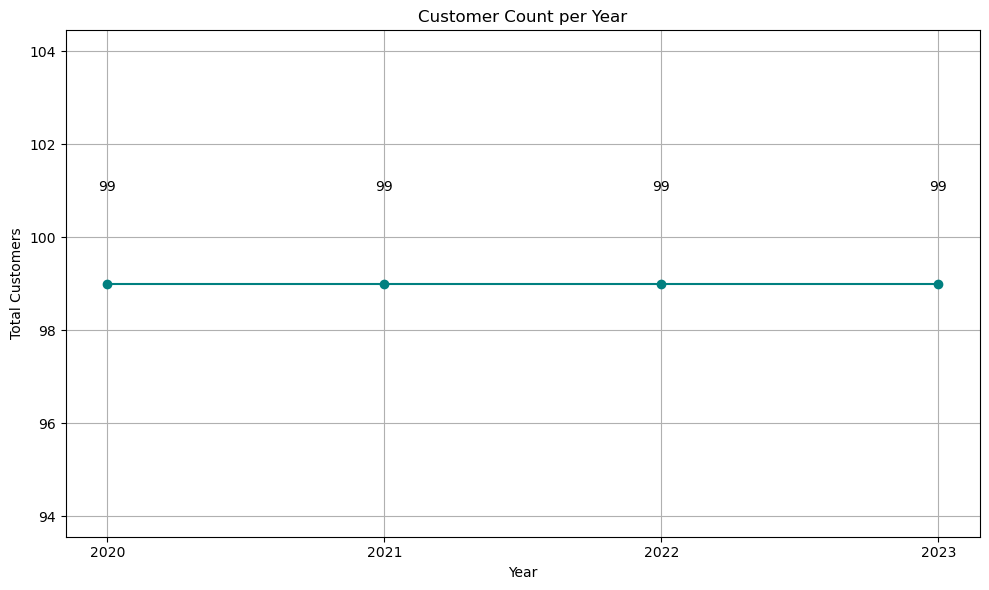

In [406]:
# Count distinct customers per year
customer_trend = df['Customer'].groupby(df['Year']).nunique()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(customer_trend.index, customer_trend.values, marker='o', color='teal')

# Annotate data points
for year, count in zip(customer_trend.index, customer_trend.values):
    plt.text(year, count * 1.02, str(count), ha='center', fontsize=10, color='black')

# Customize plot
plt.title('Customer Count per Year')
plt.xlabel('Year')
plt.ylabel('Total Customers')
plt.xticks(customer_trend.index)
plt.grid(True)
plt.tight_layout()
plt.show()


Setelah menganalisis jumlah pelanggan per tahun, terlihat bahwa selama 4 tahun (2020–2023), jumlah pelanggan tetap stabil. Hal ini kemungkinan disebabkan oleh keterbatasan data. Namun, kita juga bisa mengasumsikan bahwa perusahaan berhasil menjaga retensi pelanggan dengan baik, karena jumlah pelanggan tidak mengalami penurunan.

#### **Top 10 Customer by Revenue**

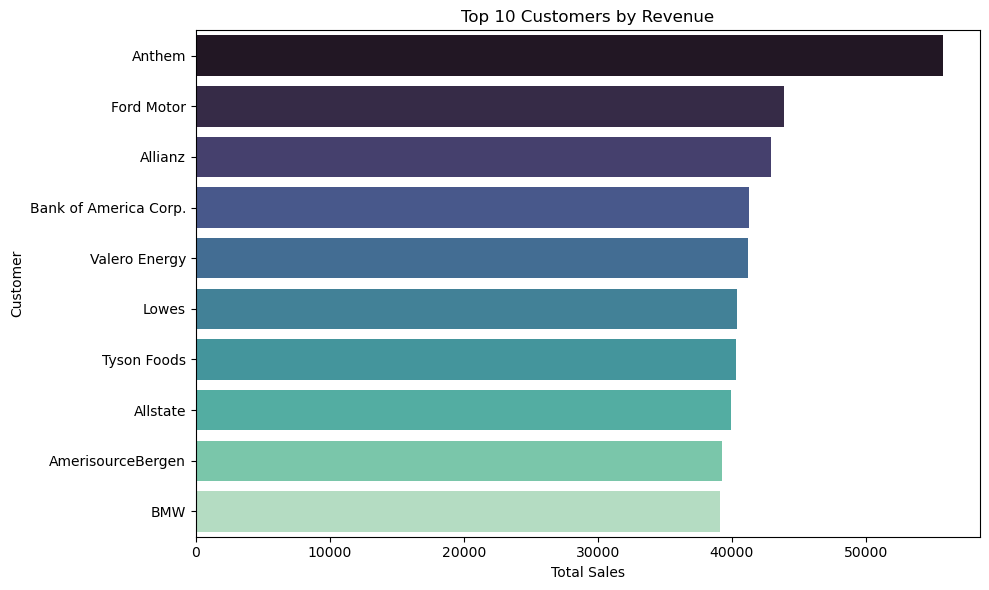

In [407]:
# Calculate top 10 customers by total sales
top_customers = df.groupby('Customer')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='Sales', y='Customer', palette='mako')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Total Sales')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()

- Customer **Anthem** menempati posisi pertama dengan total penjualan tertinggi. Hal ini menunjukkan bahwa Anthem merupakan kontributor terbesar terhadap pendapatan perusahaan. Fokus pada hubungan jangka panjang dan penawaran layanan tambahan ke Anthem dapat memberikan dampak besar terhadap pertumbuhan bisnis.
- Di posisi berikutnya terdapat **Ford Motor** dan **Allianz**, dua perusahaan besar yang juga berperan penting dalam menyumbang penjualan. Hal ini mengindikasikan bahwa perusahaan telah berhasil menjangkau klien korporasi berskala besar dengan kebutuhan layanan yang luas.
- **BMW** berada di peringkat ke-10, yang meskipun masih dalam jajaran pelanggan utama, menunjukkan peluang untuk meningkatkan engagement dan nilai penjualannya. Upaya seperti peningkatan personalisasi layanan, strategi upselling, atau peningkatan layanan purna jual bisa dipertimbangkan untuk pelanggan seperti ini.

#### **Pengaruh Diskon Sebagai Penawaran Kepada Customer**

Setelah menganalisis retensi pelanggan lama, kita juga perlu mengevaluasi apakah pemberian diskon efektif dalam menarik pelanggan baru.

In [408]:
# Check the correlation of discount with sales and profit
df[['Discount', 'Profit', 'Sales']].corr('spearman')

,Discount,Profit,Sales
Discount,1.000000,-0.543350,-0.056969
Profit,-0.543350,1.000000,0.518407
Sales,-0.056969,0.518407,1.000000


Hasil analisis korelasi memberikan beberapa wawasan penting:

- Terdapat korelasi negatif sebesar **-0.54** antara **diskon dan profit**, yang menunjukkan bahwa pemberian diskon berdampak langsung dalam menurunkan margin keuntungan. Hal ini cukup wajar mengingat diskon memangkas nilai pendapatan bersih dari setiap transaksi.

- Sementara itu, korelasi antara **diskon dan penjualan** juga menunjukkan nilai negatif, yaitu **-0.05**. Nilai ini menunjukkan bahwa pemberian diskon tidak terlalu berpengaruh terhadap peningkatan volume penjualan.

- Berdasarkan temuan ini, dapat diasumsikan bahwa pelanggan kita—yang mayoritas berasal dari kalangan perusahaan besar—lebih memprioritaskan kualitas dan nilai fungsional produk, daripada tertarik pada potongan harga. Maka dari itu, strategi diskon mungkin bukan pendekatan paling efektif untuk segmen pasar ini.

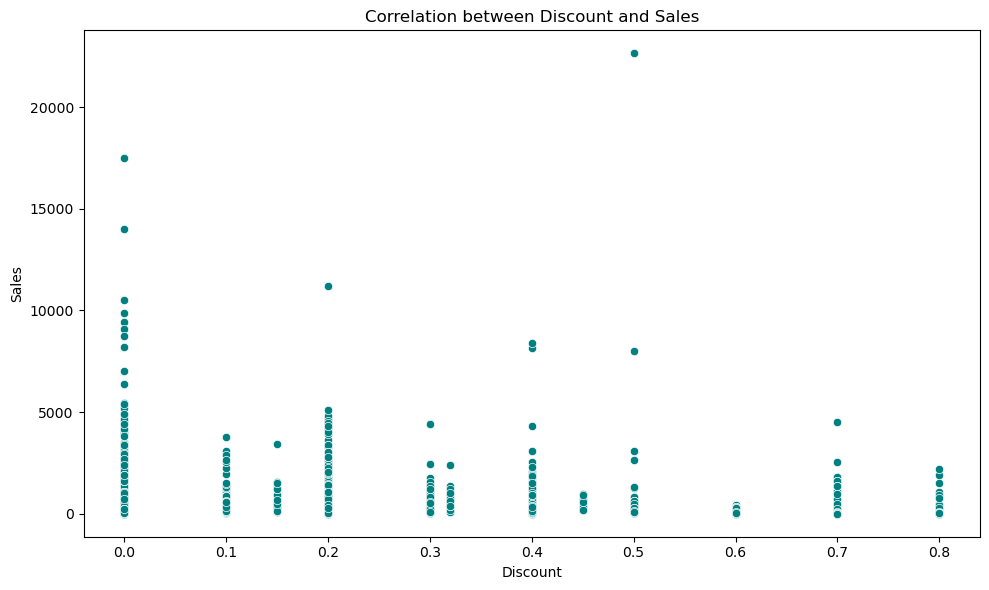

In [409]:
#  Create a scatterplot to show the correlation between Discount and Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Discount'], y=df['Sales'], color='teal')
plt.title('Correlation between Discount and Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

Dari scatterplot di atas, kita bisa melihat pola penjualan pada berbagai tingkat diskon:

- Saat tidak ada diskon (0%), ternyata nilai penjualan tetap bisa sangat tinggi. Ini menunjukkan bahwa sebagian besar pelanggan tidak terlalu bergantung pada diskon saat memutuskan membeli, yang merupakan tanda positif bahwa mereka percaya pada kualitas produk kita.

- Penjualan tertinggi justru terjadi saat diskon mencapai 50%. Ini memberi gambaran bahwa diskon masih bisa relevan dalam mendorong penjualan, meskipun dampaknya secara keseluruhan tidak terlalu besar.

- Temuan ini bisa dibilang mendukung dan sekaligus membantah analisis sebelumnya. Di satu sisi, pelanggan—terutama dari kalangan SMB—mungkin sensitif terhadap harga. Tapi di sisi lain, mereka juga menunjukkan kesediaan untuk membayar penuh jika memang merasa produk kita memiliki nilai yang sesuai. Jadi, membangun kepercayaan tetap menjadi kunci, sementara diskon bisa dijadikan strategi pelengkap pada waktu yang tepat.

# **Kesimpulan dan Rekomendasi** 

---

## **Kesimpulan**

 #### **Segmen dan Perilaku Pelanggan**
- **Pelanggan Terbesar Berasal dari SMB**  
Sebagian besar pelanggan kita berasal dari segmen usaha kecil dan menengah (SMB), yang kemungkinan besar memilih produk kita karena harganya terjangkau dan mudah diterapkan.

- **SMB Menjadi Penyumbang Penjualan dan Profit Terbesar**  
Kontribusi terbesar terhadap penjualan dan keuntungan berasal dari SMB, diikuti oleh segmen Strategic dan Enterprise.

- **Industri Finance Memimpin**  
Sektor Finance menjadi pendorong pendapatan utama dengan jumlah transaksi dan nilai penjualan tertinggi.

- **Industri Energi, Tech, dan Manufacuring Relevan**  
Ketiga sektor ini juga menunjukkan keterkaitan kuat dengan produk kita, ditunjukkan melalui volume transaksi dan penjualan yang signifikan.

- **Anomali di Sektor Tech & Transportasi**  
Meski transaksi di industri teknologi cukup tinggi, penjualannya tidak dominan, kemungkinan karena tekanan harga di pasar. Sementara itu, sektor transportasi mencatat penjualan terendah, diduga karena permintaan yang lebih rendah terhadap produk kita.

#### **Sales and Profit Performance**
- **Rasio Laba terhadap Penjualan** menunjukkan peningkatan pada tahun 2021. Hal ini kemungkinan disebabkan oleh efisiensi operasional dan pengelolaan biaya yang lebih baik. Perlu ditelusuri lebih lanjut strategi apa yang berkontribusi terhadap perbaikan ini.

- Meskipun penjualan sempat turun di tahun 2021, **tren profit justru terus meningkat dari 2020 hingga 2023**, menandakan bahwa perusahaan berhasil meningkatkan margin keuntungannya meski dalam kondisi pasar yang menantang.

- **Penjualan secara umum mengalami peningkatan dari tahun ke tahun**, meskipun terjadi penurunan pada 2021. Penurunan ini sejalan dengan tantangan ekonomi global akibat pandemi COVID-19, yang berdampak pada pengeluaran konsumen dan investasi bisnis.

#### **Distribusi Geografis**
- **Pasar Terbesar di AS dan Inggris**  
Amerika Serikat dan Inggris menjadi pasar utama perusahaan, dengan kontribusi penjualan dan keuntungan tertinggi.

- **Distribusi Penjualan Merata, tapi APJ Bermasalah**  
Secara umum, distribusi penjualan dan profit antar wilayah cukup seimbang. Namun, kawasan APJ mencatat keuntungan yang sangat rendah meski penjualannya cukup baik.

- **Jepang Perlu Perhatian Khusus**  
Meskipun Jepang berada di posisi ketiga dalam penjualan, negara ini justru mencatat kerugian terbesar. Hal ini kemungkinan disebabkan oleh biaya tinggi atau faktor eksternal lainnya. Bahkan, 7 dari 14 produk di Jepang merugi, dan ContactMatcher menjadi penyumbang kerugian terbesar.

- **Negara dengan Profit Negatif**  
Beberapa negara lain juga menunjukkan profit negatif, sehingga diperlukan analisis lebih lanjut terhadap strategi harga, efisiensi biaya, dan permintaan pasar di masing-masing negara.

#### **Faktor untuk meningkatkan Sales dan Profit**
- **Bisnis SaaS mengandalkan langganan** sebagai sumber pendapatan. Maka, jumlah pelanggan dan retensi menjadi kunci utama dalam meningkatkan pendapatan.

- **Diskon bisa menarik pelanggan baru**, namun perlu dianalisis lebih lanjut dampaknya terhadap penjualan dan profit.

- **Jumlah pelanggan stabil**, menunjukkan tren retensi yang baik dan loyalitas pelanggan yang cukup terjaga.

- **Diskon terbukti menurunkan profit**, namun penjualan tertinggi justru terjadi saat diskon 50%. Ini menunjukkan diskon masih bisa relevan, meski tidak selalu berdampak besar.

- **Pelanggan SMB dominan**, cenderung sensitif pada harga tapi tetap menghargai kualitas. Maka, menjaga kepercayaan tetap penting, terlepas dari strategi diskon.

- **Data mungkin memiliki keterbatasan**, yang bisa memengaruhi hasil analisis dan perlu jadi catatan dalam pengambilan kesimpulan.

- **Anthem jadi pelanggan terbesar**, disusul Ford dan Allianz. Pelanggan besar ini perlu dijaga sebagai prioritas bisnis.

## **Rekomendasi**

### 1. **Optimalkan Strategi Harga dan Diskon**  
- **Tinjau Dampak Diskon**: Diskon memang dapat menarik pelanggan baru, namun juga berdampak negatif terhadap profit. Pertimbangkan diskon yang lebih selektif dan terbatas waktu, seperti potongan kecil (misal 0,5%) yang terbukti mampu mendorong penjualan tanpa mengorbankan margin terlalu besar.  
- **Uji Strategi Harga Penuh**: Karena banyak pelanggan SMB terbukti bersedia membayar harga penuh, strategi pengurangan frekuensi diskon dan penekanan pada nilai serta kepercayaan bisa menjadi pendekatan yang lebih efektif.

### 2. **Fokus pada Retensi Pelanggan**  
- **Maksimalkan Model Langganan**: Karena pendapatan utama berasal dari langganan, penting untuk memperkuat strategi retensi pelanggan. Ini dapat dilakukan melalui program loyalitas, layanan personalisasi, serta pemberian nilai tambah secara konsisten agar pelanggan tetap berlangganan dalam jangka panjang.

### 3. **Tinjau Wilayah dan Produk dengan Profit Rendah**  
- **Tangani Masalah di Wilayah APJ**: Meskipun penjualannya cukup baik, wilayah APJ mencatat profit yang rendah. Diperlukan peninjauan lebih lanjut terkait tantangan yang dihadapi, seperti biaya operasional atau kondisi pasar.  
- **Evaluasi Strategi di Jepang**: Jepang mencatat kerugian terbesar, terutama pada produk seperti ContactMatcher. Perlu ditinjau ulang strategi harga, efisiensi operasional, serta kesesuaian produk dengan kebutuhan pasar lokal.

### 5. **Atasi Persaingan di Industri Teknologi**  
- **Perkuat Nilai Produk**: Di sektor teknologi yang sangat kompetitif, penjualan tidak selalu sebanding dengan jumlah transaksi. Untuk itu, penting untuk meningkatkan nilai tambah, misalnya melalui model harga yang fleksibel, bundling layanan, atau fitur tambahan yang relevan dengan kebutuhan industri.

### 6. **Sesuaikan Penawaran untuk Industri Potensial**  
- **Fokus pada Sektor Prioritas**: Perkuat relasi dan sesuaikan penawaran untuk sektor keuangan, energi, teknologi, dan manufaktur. Pastikan produk yang ditawarkan benar-benar sesuai dengan tantangan dan kebutuhan masing-masing industri.